# **Desafio de Dados da ihm stefanini**

## André Almeida Santos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from pandas.tseries.offsets import DateOffset

from sklearn.model_selection import train_test_split

### **Primeira etapa**: Carregar, organizar e verificar a consistência dos dados
---


In [2]:
# Leitura dos dados com correção dos decimais e data como index

dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ihm_challenge/MiningProcess_Flotation_Plant_Database.csv', sep=',', decimal=',')
dados.index = pd.to_datetime(dados.date, format = '%Y-%m-%d %H:%M:%S')
dados.drop(columns='date', inplace=True)
dados

% Iron Feed  % Silica Feed  Starch Flow  Amina Flow  \
date                                                                       
2017-03-10 01:00:00        55.20          16.98      3019.53     557.434   
2017-03-10 01:00:00        55.20          16.98      3024.41     563.965   
2017-03-10 01:00:00        55.20          16.98      3043.46     568.054   
2017-03-10 01:00:00        55.20          16.98      3047.36     568.665   
2017-03-10 01:00:00        55.20          16.98      3033.69     558.167   
...                          ...            ...          ...         ...   
2017-09-09 23:00:00        49.75          23.20      2710.94     441.052   
2017-09-09 23:00:00        49.75          23.20      2692.01     473.436   
2017-09-09 23:00:00        49.75          23.20      2692.20     500.488   
2017-09-09 23:00:00        49.75          23.20      1164.12     491.548   
2017-09-09 23:00:00        49.75          23.20      1164.12     468.019   

                     Ore Pulp Flow  Ore Pulp pH  Ore Pulp Density  \
date                                                                
2017-03-10 01:00:00        395.713     10.06640           1.74000   
2017-03-10 01:00:00        397.383     10.06720           1.74000   
2017-03-10 01:00:00        399.668     10.06800           1.74000   
2017-03-10 01:00:00        397.939     10.06890           1.74000   
2017-03-10 01:00:00        400.254     10.06970           1.74000   
...                            ...          ...               ...   
2017-09-09 23:00:00        386.570      9.62129           1.65365   
2017-09-09 23:00:00        384.939      9.62063           1.65352   
2017-09-09 23:00:00        383.496      9.61874           1.65338   
2017-09-09 23:00:00        384.976      9.61686           1.65324   
2017-09-09 23:00:00        384.801      9.61497           1.65310   

                     Flotation Column 01 Air Flow  \
date                                                
2017-03-10 01:00:00                       249.214   
2017-03-10 01:00:00                       249.719   
2017-03-10 01:00:00                       249.741   
2017-03-10 01:00:00                       249.917   
2017-03-10 01:00:00                       250.203   
...                                           ...   
2017-09-09 23:00:00                       302.344   
2017-09-09 23:00:00                       303.013   
2017-09-09 23:00:00                       303.662   
2017-09-09 23:00:00                       302.550   
2017-09-09 23:00:00                       300.355   

                     Flotation Column 02 Air Flow  \
date                                                
2017-03-10 01:00:00                       253.235   
2017-03-10 01:00:00                       250.532   
2017-03-10 01:00:00                       247.874   
2017-03-10 01:00:00                       254.487   
2017-03-10 01:00:00                       252.136   
...                                           ...   
2017-09-09 23:00:00                       298.786   
2017-09-09 23:00:00                       301.879   
2017-09-09 23:00:00                       307.397   
2017-09-09 23:00:00                       301.959   
2017-09-09 23:00:00                       292.865   

                     Flotation Column 03 Air Flow  ...  \
date                                               ...   
2017-03-10 01:00:00                       250.576  ...   
2017-03-10 01:00:00                       250.862  ...   
2017-03-10 01:00:00                       250.313  ...   
2017-03-10 01:00:00                       250.049  ...   
2017-03-10 01:00:00                       249.895  ...   
...                                           ...  ...   
2017-09-09 23:00:00                       299.163  ...   
2017-09-09 23:00:00                       299.487  ...   
2017-09-09 23:00:00                       299.487  ...   
2017-09-09 23:00:00                       298.045  ...   
2017-09-09 23:00:00                       298.625  ...   


In [3]:
# Informações sobre tipos de dados e quantidade de features
dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 737453 entries, 2017-03-10 01:00:00 to 2017-09-09 23:00:00
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   % Iron Feed                   737453 non-null  float64
 1   % Silica Feed                 737453 non-null  float64
 2   Starch Flow                   737453 non-null  float64
 3   Amina Flow                    737453 non-null  float64
 4   Ore Pulp Flow                 737453 non-null  float64
 5   Ore Pulp pH                   737453 non-null  float64
 6   Ore Pulp Density              737453 non-null  float64
 7   Flotation Column 01 Air Flow  737453 non-null  float64
 8   Flotation Column 02 Air Flow  737453 non-null  float64
 9   Flotation Column 03 Air Flow  737453 non-null  float64
 10  Flotation Column 04 Air Flow  737453 non-null  float64
 11  Flotation Column 05 Air Flow  737453 non-null  float64
 12  Flotation 

Inicialmente irei assumir que as principais features apresentadas na descrição do problema são suficientes para realizar a predição.

In [4]:
# Descrição estatística
dados.describe()

% Iron Feed  % Silica Feed    Starch Flow     Amina Flow  \
count  737453.000000  737453.000000  737453.000000  737453.000000   
mean       56.294739      14.651716    2869.140569     488.144697   
std         5.157744       6.807439    1215.203734      91.230534   
min        42.740000       1.310000       0.002026     241.669000   
25%        52.670000       8.940000    2076.320000     431.796000   
50%        56.080000      13.850000    3018.430000     504.393000   
75%        59.720000      19.600000    3727.730000     553.257000   
max        65.780000      33.400000    6300.230000     739.538000   

       Ore Pulp Flow    Ore Pulp pH  Ore Pulp Density  \
count  737453.000000  737453.000000     737453.000000   
mean      397.578372       9.767639          1.680380   
std         9.699785       0.387007          0.069249   
min       376.249000       8.753340          1.519820   
25%       394.264000       9.527360          1.647310   
50%       399.249000       9.798100          1.697600   
75%       402.968000      10.038000          1.728330   
max       418.641000      10.808100          1.853250   

       Flotation Column 01 Air Flow  Flotation Column 02 Air Flow  \
count                 737453.000000                 737453.000000   
mean                     280.151856                    277.159965   
std                       29.621288                     30.149357   
min                      175.510000                    175.156000   
25%                      250.281000                    250.457000   
50%                      299.344000                    296.223000   
75%                      300.149000                    300.690000   
max                      373.871000                    375.992000   

       Flotation Column 03 Air Flow  ...  Flotation Column 07 Air Flow  \
count                 737453.000000  ...                 737453.000000   
mean                     281.082397  ...                    290.754856   
std                       28.558268  ...                     28.670105   
min                      176.469000  ...                    185.962000   
25%                      250.855000  ...                    256.302000   
50%                      298.696000  ...                    299.011000   
75%                      300.382000  ...                    301.904000   
max                      364.346000  ...                    371.593000   

       Flotation Column 01 Level  Flotation Column 02 Level  \
count              737453.000000              737453.000000   
mean                  520.244823                 522.649555   
std                   131.014924                 128.165050   
min                   149.218000                 210.752000   
25%                   416.978000                 441.883000   
50%                   491.878000                 495.956000   
75%                   594.114000                 595.464000   
max                   862.274000                 828.919000   

       Flotation Column 03 Level  Flotation Column 04 Level  \
count              737453.000000              737453.000000   
mean                  531.352662                 420.320973   
std                   150.842164                  91.794432   
min                   126.255000                 162.201000   
25%                   411.325000                 356.679000   
50%                   494.318000                 411.974000   
75%                   601.249000                 485.549000   
max                   886.822000                 680.359000   

       Flotation Column 05 Level  Flotation Column 06 Level  \
count              737453.000000              737453.000000   
mean                  425.251706                 429.941018   
std                    84.535822                  89.862225   
min                   166.991000                 155.841000   
25%                   357.653000                 358.497000   
50%                   408.773000                 424.664575   
75%    

Agrupando os dados por hora para análises iniciais

In [5]:
registros_Hora = dados.groupby(pd.Grouper(freq='H'))

In [6]:
desc_registros_Hora = registros_Hora.describe()
desc_registros_Hora

% Iron Feed                                            \
                          count   mean           std    min    25%    50%   
date                                                                        
2017-03-10 01:00:00       174.0  55.20  7.125934e-15  55.20  55.20  55.20   
2017-03-10 02:00:00       180.0  55.20  0.000000e+00  55.20  55.20  55.20   
2017-03-10 03:00:00       180.0  55.20  0.000000e+00  55.20  55.20  55.20   
2017-03-10 04:00:00       180.0  55.20  0.000000e+00  55.20  55.20  55.20   
2017-03-10 05:00:00       180.0  55.20  0.000000e+00  55.20  55.20  55.20   
...                         ...    ...           ...    ...    ...    ...   
2017-09-09 19:00:00       180.0  49.75  0.000000e+00  49.75  49.75  49.75   
2017-09-09 20:00:00       180.0  49.75  0.000000e+00  49.75  49.75  49.75   
2017-09-09 21:00:00       180.0  49.75  0.000000e+00  49.75  49.75  49.75   
2017-09-09 22:00:00       180.0  49.75  0.000000e+00  49.75  49.75  49.75   
2017-09-09 23:00:00       180.0  49.75  0.000000e+00  49.75  49.75  49.75   

                                  % Silica Feed         ...  \
                       75%    max         count   mean  ...   
date                                                    ...   
2017-03-10 01:00:00  55.20  55.20         174.0  16.98  ...   
2017-03-10 02:00:00  55.20  55.20         180.0  16.98  ...   
2017-03-10 03:00:00  55.20  55.20         180.0  16.98  ...   
2017-03-10 04:00:00  55.20  55.20         180.0  16.98  ...   
2017-03-10 05:00:00  55.20  55.20         180.0  16.98  ...   
...                    ...    ...           ...    ...  ...   
2017-09-09 19:00:00  49.75  49.75         180.0  23.20  ...   
2017-09-09 20:00:00  49.75  49.75         180.0  23.20  ...   
2017-09-09 21:00:00  49.75  49.75         180.0  23.20  ...   
2017-09-09 22:00:00  49.75  49.75         180.0  23.20  ...   
2017-09-09 23:00:00  49.75  49.75         180.0  23.20  ...   

                    % Iron Concentrate        % Silica Concentrate        \
                                   75%    max                count  mean   
date                                                                       
2017-03-10 01:00:00              66.91  66.91                174.0  1.31   
2017-03-10 02:00:00              67.06  67.06                180.0  1.11   
2017-03-10 03:00:00              66.97  66.97                180.0  1.27   
2017-03-10 04:00:00              66.75  66.75                180.0  1.36   
2017-03-10 05:00:00              66.63  66.63                180.0  1.34   
...                                ...    ...                  ...   ...   
2017-09-09 19:00:00              65.05  65.05                180.0  1.65   
2017-09-09 20:00:00              64.83  64.83                180.0  1.71   
2017-09-09 21:00:00              64.29  64.29                180.0  1.80   
2017-09-09 22:00:00              64.25  64.25                180.0  1.96   
2017-09-09 23:00:00              64.27  64.27                180.0  1.71   

                                                                 
                              std   min   25%   50%   75%   max  
date                                                             
2017-03-10 01:00:00  2.226854e-16  1.31  1.31  1.31  1.31  1.31  
2017-03-10 02:00:00  2.226640e-16  1.11  1.11  1.11  1.11  1.11  
2017-03-10 03:00:00  4.453280e-16  1.27  1.27  1.27  1.27  1.27  
2017-03-10 04:00:00  4.453280e-16  1.36  1.36  1.36  1.36  1.36  
2017-03-10 05:00:00  0.000000e+00  1.34  1.34  1.34  1.34  1.34  
...                           ...   ...   ...   ...   ...   ...  
2017-09-09 19:00:00  0.000000e+00  1.65  1.65  1.65  1.65  1.65  
2017-09-09 20:00:00  6.679919e-16  1.71  1.71  1.71  1.71  1.71  
2017-09-09 21:00:00  6.679919e-16  1.80  1.80  1.80  1.80  1.80  
2017-09-09 22:00:00  6.679919e-16  1.96  1.96  1.96  1.96  1.96  
2017-09-09 23:00:00  6.679919e-16  1.71  1.71  1.71  1.71  1.71  

[4415 rows x 184 columns]

In [7]:
# Calcular a média dos valores de desvio padrão, agrupado por hora, de cada coluna dos dados
for col in dados.columns:
    print(f'{col} : {desc_registros_Hora[col]["std"].mean()}')

% Iron Feed : 1.2389617378580714e-14
% Silica Feed : 2.548489033918287e-15
Starch Flow : 634.6061482370465
Amina Flow : 28.39969368836482
Ore Pulp Flow : 4.252541270810733
Ore Pulp pH : 0.06756234943833535
Ore Pulp Density : 0.02070127494189207
Flotation Column 01 Air Flow : 1.34619696498534
Flotation Column 02 Air Flow : 4.966326954121056
Flotation Column 03 Air Flow : 1.743913238157637
Flotation Column 04 Air Flow : 0.664892501859152
Flotation Column 05 Air Flow : 1.13389929660609
Flotation Column 06 Air Flow : 4.433625250690233
Flotation Column 07 Air Flow : 4.853338614366412
Flotation Column 01 Level : 27.102026397382197
Flotation Column 02 Level : 33.44266815871435
Flotation Column 03 Level : 32.923494898057974
Flotation Column 04 Level : 40.306033163047346
Flotation Column 05 Level : 29.72779909255635
Flotation Column 06 Level : 37.40039637822688
Flotation Column 07 Level : 36.822797050339275
% Iron Concentrate : 0.004902610334627937
% Silica Concentrate : 0.006917516762965203


Analisando as amostras agrupadas acima é possível identificar que os dados com pouquíssima variação são: **% Iron Feed**, **% Silica Feed**, **% Iron Concentrate** e **% Silica Concentrate**. 

Logo, me parece que eles são os amostrados por hora e os valores coletados foram replicados nos registros amostrados por segundo.

### **Segunda etapa**: Análise dos dados
---

#### Analisando os dados

Agora, irei verificar a quantidade dos registros agrupados por hora.

1 hora possui 3600 segundos. 

Uma amostragem de 20s em 20s irá gerar 180 registros em cada hora.

In [8]:
# Contando a quantidade de registros
count_registros_H = registros_Hora.count()
count_registros_H

% Iron Feed  % Silica Feed  Starch Flow  Amina Flow  \
date                                                                       
2017-03-10 01:00:00          174            174          174         174   
2017-03-10 02:00:00          180            180          180         180   
2017-03-10 03:00:00          180            180          180         180   
2017-03-10 04:00:00          180            180          180         180   
2017-03-10 05:00:00          180            180          180         180   
...                          ...            ...          ...         ...   
2017-09-09 19:00:00          180            180          180         180   
2017-09-09 20:00:00          180            180          180         180   
2017-09-09 21:00:00          180            180          180         180   
2017-09-09 22:00:00          180            180          180         180   
2017-09-09 23:00:00          180            180          180         180   

                     Ore Pulp Flow  Ore Pulp pH  Ore Pulp Density  \
date                                                                
2017-03-10 01:00:00            174          174               174   
2017-03-10 02:00:00            180          180               180   
2017-03-10 03:00:00            180          180               180   
2017-03-10 04:00:00            180          180               180   
2017-03-10 05:00:00            180          180               180   
...                            ...          ...               ...   
2017-09-09 19:00:00            180          180               180   
2017-09-09 20:00:00            180          180               180   
2017-09-09 21:00:00            180          180               180   
2017-09-09 22:00:00            180          180               180   
2017-09-09 23:00:00            180          180               180   

                     Flotation Column 01 Air Flow  \
date                                                
2017-03-10 01:00:00                           174   
2017-03-10 02:00:00                           180   
2017-03-10 03:00:00                           180   
2017-03-10 04:00:00                           180   
2017-03-10 05:00:00                           180   
...                                           ...   
2017-09-09 19:00:00                           180   
2017-09-09 20:00:00                           180   
2017-09-09 21:00:00                           180   
2017-09-09 22:00:00                           180   
2017-09-09 23:00:00                           180   

                     Flotation Column 02 Air Flow  \
date                                                
2017-03-10 01:00:00                           174   
2017-03-10 02:00:00                           180   
2017-03-10 03:00:00                           180   
2017-03-10 04:00:00                           180   
2017-03-10 05:00:00                           180   
...                                           ...   
2017-09-09 19:00:00                           180   
2017-09-09 20:00:00                           180   
2017-09-09 21:00:00                           180   
2017-09-09 22:00:00                           180   
2017-09-09 23:00:00                           180   

                     Flotation Column 03 Air Flow  ...  \
date                                               ...   
2017-03-10 01:00:00                           174  ...   
2017-03-10 02:00:00                           180  ...   
2017-03-10 03:00:00                           180  ...   
2017-03-10 04:00:00                           180  ...   
2017-03-10 05:00:00                           180  ...   
...                                           ...  ...   
2017-09-09 19:00:00                           180  ...   
2017-09-09 20:00:00                           180  ...   
2017-09-09 21:00:00                           180  ...   
2017-09-09 22:00:00                           180  ...   
2017-09-09 23:00:00                           180  ...   


In [9]:
# Filtrando os ques são diferente de 180
count_registros_H[count_registros_H['% Iron Feed'] != 180]

% Iron Feed  % Silica Feed  Starch Flow  Amina Flow  \
date                                                                       
2017-03-10 01:00:00          174            174          174         174   
2017-03-16 06:00:00            0              0            0           0   
2017-03-16 07:00:00            0              0            0           0   
2017-03-16 08:00:00            0              0            0           0   
2017-03-16 09:00:00            0              0            0           0   
...                          ...            ...          ...         ...   
2017-03-29 08:00:00            0              0            0           0   
2017-03-29 09:00:00            0              0            0           0   
2017-03-29 10:00:00            0              0            0           0   
2017-03-29 11:00:00            0              0            0           0   
2017-04-10 00:00:00          179            179          179         179   

                     Ore Pulp Flow  Ore Pulp pH  Ore Pulp Density  \
date                                                                
2017-03-10 01:00:00            174          174               174   
2017-03-16 06:00:00              0            0                 0   
2017-03-16 07:00:00              0            0                 0   
2017-03-16 08:00:00              0            0                 0   
2017-03-16 09:00:00              0            0                 0   
...                            ...          ...               ...   
2017-03-29 08:00:00              0            0                 0   
2017-03-29 09:00:00              0            0                 0   
2017-03-29 10:00:00              0            0                 0   
2017-03-29 11:00:00              0            0                 0   
2017-04-10 00:00:00            179          179               179   

                     Flotation Column 01 Air Flow  \
date                                                
2017-03-10 01:00:00                           174   
2017-03-16 06:00:00                             0   
2017-03-16 07:00:00                             0   
2017-03-16 08:00:00                             0   
2017-03-16 09:00:00                             0   
...                                           ...   
2017-03-29 08:00:00                             0   
2017-03-29 09:00:00                             0   
2017-03-29 10:00:00                             0   
2017-03-29 11:00:00                             0   
2017-04-10 00:00:00                           179   

                     Flotation Column 02 Air Flow  \
date                                                
2017-03-10 01:00:00                           174   
2017-03-16 06:00:00                             0   
2017-03-16 07:00:00                             0   
2017-03-16 08:00:00                             0   
2017-03-16 09:00:00                             0   
...                                           ...   
2017-03-29 08:00:00                             0   
2017-03-29 09:00:00                             0   
2017-03-29 10:00:00                             0   
2017-03-29 11:00:00                             0   
2017-04-10 00:00:00                           179   

                     Flotation Column 03 Air Flow  ...  \
date                                               ...   
2017-03-10 01:00:00                           174  ...   
2017-03-16 06:00:00                             0  ...   
2017-03-16 07:00:00                             0  ...   
2017-03-16 08:00:00                             0  ...   
2017-03-16 09:00:00                             0  ...   
...                                           ...  ...   
2017-03-29 08:00:00                             0  ...   
2017-03-29 09:00:00                             0  ...   
2017-03-29 10:00:00                             0  ...   
2017-03-29 11:00:00                             0  ...   
2017-04-10 00:00:00                           179  ...   


Com os dados acima pode ser visto que há 320 registros por hora que não possuem 180 registros:

- Na primeira hora faltam 6 registros.

- Na hora 00:00:00 do dia 10/04 falta apenas 1 registro

- Há um gap de registros entre 16/03/2017 às 06:00h e 29/03/2017 às 11:00h.

---

Assim, irei considerar duas coisas:

1. Supor que o registro faltante do dia 10/04 é o registro do momento 00h:59m:40s e considerar que a falta de 1 registro de 20s não irá fazer falta na modelagem pois o tempo da amostragem é muito curto;

2. considerar apenas os dados a partir de 29/03/2017 às 12:00h, pois como é uma série temporal o gap de 13 dias pode ser relevante na construção de um modelo preditivo temporal.

In [10]:
# Definindo o estilo de plotagem do sns
sns.set_palette('Accent')
sns.set_style('darkgrid')

# Definindo uma paleta de cores para os plots
color_iron = '#5f6d80'
color_silica = '#6d4da3'

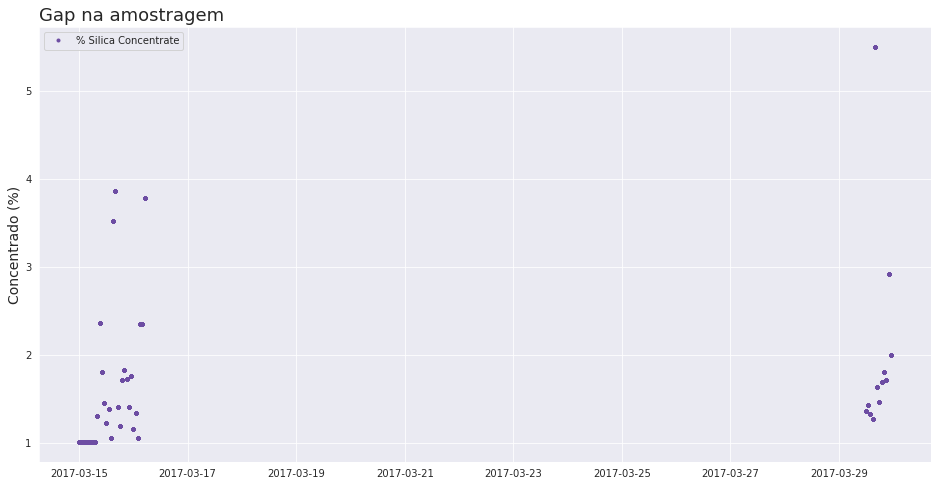

In [11]:
plt.figure(figsize=(16,8))
plt.plot(dados['% Silica Concentrate']['2017-03-15 00:00:00':'2017-03-29 23:00:00'], '.', label='% Silica Concentrate', color=color_silica)
plt.title('Gap na amostragem', loc='left', fontsize=18)
plt.ylabel('Concentrado (%)', fontsize=14)
plt.legend()
plt.show()

In [12]:
# Criar uma série de datas a partir de 29/03 as 12:00 
# e eliminar o item específico em  10/04 às 00h:59m:40s pois não há registro para este momento
novo_index = pd.Series(pd.date_range(start='2017-03-29 12:00:00', end='2017-09-09 23:59:40', freq='20S'))

id = novo_index[novo_index == '2017-04-10 00:59:40'].index[0]
novo_index.drop(id, inplace=True)

In [13]:
# Criando um novo DataFrame para salvar os registros a partir de 29/03

dados_segundos = dados.loc['2017-03-29 12:00:00':,:].copy()
dados_segundos

% Iron Feed  % Silica Feed  Starch Flow  Amina Flow  \
date                                                                       
2017-03-29 12:00:00        60.18           9.34      2044.99     349.911   
2017-03-29 12:00:00        60.18           9.34      2020.55     353.064   
2017-03-29 12:00:00        60.18           9.34      2012.84     356.217   
2017-03-29 12:00:00        60.18           9.34      2007.67     359.371   
2017-03-29 12:00:00        60.18           9.34      2003.92     362.524   
...                          ...            ...          ...         ...   
2017-09-09 23:00:00        49.75          23.20      2710.94     441.052   
2017-09-09 23:00:00        49.75          23.20      2692.01     473.436   
2017-09-09 23:00:00        49.75          23.20      2692.20     500.488   
2017-09-09 23:00:00        49.75          23.20      1164.12     491.548   
2017-09-09 23:00:00        49.75          23.20      1164.12     468.019   

                     Ore Pulp Flow  Ore Pulp pH  Ore Pulp Density  \
date                                                                
2017-03-29 12:00:00        405.625      9.74604          1.649650   
2017-03-29 12:00:00        404.402      9.74169          1.643469   
2017-03-29 12:00:00        403.180      9.73733          1.637289   
2017-03-29 12:00:00        401.957      9.73298          1.631108   
2017-03-29 12:00:00        400.735      9.72862          1.624928   
...                            ...          ...               ...   
2017-09-09 23:00:00        386.570      9.62129          1.653650   
2017-09-09 23:00:00        384.939      9.62063          1.653520   
2017-09-09 23:00:00        383.496      9.61874          1.653380   
2017-09-09 23:00:00        384.976      9.61686          1.653240   
2017-09-09 23:00:00        384.801      9.61497          1.653100   

                     Flotation Column 01 Air Flow  \
date                                                
2017-03-29 12:00:00                       200.393   
2017-03-29 12:00:00                       200.131   
2017-03-29 12:00:00                       199.869   
2017-03-29 12:00:00                       199.607   
2017-03-29 12:00:00                       199.345   
...                                           ...   
2017-09-09 23:00:00                       302.344   
2017-09-09 23:00:00                       303.013   
2017-09-09 23:00:00                       303.662   
2017-09-09 23:00:00                       302.550   
2017-09-09 23:00:00                       300.355   

                     Flotation Column 02 Air Flow  \
date                                                
2017-03-29 12:00:00                       195.734   
2017-03-29 12:00:00                       196.476   
2017-03-29 12:00:00                       197.219   
2017-03-29 12:00:00                       197.961   
2017-03-29 12:00:00                       198.703   
...                                           ...   
2017-09-09 23:00:00                       298.786   
2017-09-09 23:00:00                       301.879   
2017-09-09 23:00:00                       307.397   
2017-09-09 23:00:00                       301.959   
2017-09-09 23:00:00                       292.865   

                     Flotation Column 03 Air Flow  ...  \
date                                               ...   
2017-03-29 12:00:00                       201.826  ...   
2017-03-29 12:00:00                       200.909  ...   
2017-03-29 12:00:00                       199.992  ...   
2017-03-29 12:00:00                       199.075  ...   
2017-03-29 12:00:00                       198.158  ...   
...                                           ...  ...   
2017-09-09 23:00:00                       299.163  ...   
2017-09-09 23:00:00                       299.487  ...   
2017-09-09 23:00:00                       299.487  ...   
2017-09-09 23:00:00                       298.045  ...   
2017-09-09 23:00:00                       298.625  ...   


In [14]:
# Criando nova coluna com o tempo mapeado de 20s em 20s
dados_segundos['date_seconds'] = novo_index.values

In [15]:
# Alterando os índices para ter o novo DataFrame organizado por amostragem em segundos
dados_segundos.index = dados_segundos['date_seconds']
dados_segundos.drop(columns='date_seconds', inplace=True)
dados_segundos

% Iron Feed  % Silica Feed  Starch Flow  Amina Flow  \
date_seconds                                                               
2017-03-29 12:00:00        60.18           9.34      2044.99     349.911   
2017-03-29 12:00:20        60.18           9.34      2020.55     353.064   
2017-03-29 12:00:40        60.18           9.34      2012.84     356.217   
2017-03-29 12:01:00        60.18           9.34      2007.67     359.371   
2017-03-29 12:01:20        60.18           9.34      2003.92     362.524   
...                          ...            ...          ...         ...   
2017-09-09 23:58:20        49.75          23.20      2710.94     441.052   
2017-09-09 23:58:40        49.75          23.20      2692.01     473.436   
2017-09-09 23:59:00        49.75          23.20      2692.20     500.488   
2017-09-09 23:59:20        49.75          23.20      1164.12     491.548   
2017-09-09 23:59:40        49.75          23.20      1164.12     468.019   

                     Ore Pulp Flow  Ore Pulp pH  Ore Pulp Density  \
date_seconds                                                        
2017-03-29 12:00:00        405.625      9.74604          1.649650   
2017-03-29 12:00:20        404.402      9.74169          1.643469   
2017-03-29 12:00:40        403.180      9.73733          1.637289   
2017-03-29 12:01:00        401.957      9.73298          1.631108   
2017-03-29 12:01:20        400.735      9.72862          1.624928   
...                            ...          ...               ...   
2017-09-09 23:58:20        386.570      9.62129          1.653650   
2017-09-09 23:58:40        384.939      9.62063          1.653520   
2017-09-09 23:59:00        383.496      9.61874          1.653380   
2017-09-09 23:59:20        384.976      9.61686          1.653240   
2017-09-09 23:59:40        384.801      9.61497          1.653100   

                     Flotation Column 01 Air Flow  \
date_seconds                                        
2017-03-29 12:00:00                       200.393   
2017-03-29 12:00:20                       200.131   
2017-03-29 12:00:40                       199.869   
2017-03-29 12:01:00                       199.607   
2017-03-29 12:01:20                       199.345   
...                                           ...   
2017-09-09 23:58:20                       302.344   
2017-09-09 23:58:40                       303.013   
2017-09-09 23:59:00                       303.662   
2017-09-09 23:59:20                       302.550   
2017-09-09 23:59:40                       300.355   

                     Flotation Column 02 Air Flow  \
date_seconds                                        
2017-03-29 12:00:00                       195.734   
2017-03-29 12:00:20                       196.476   
2017-03-29 12:00:40                       197.219   
2017-03-29 12:01:00                       197.961   
2017-03-29 12:01:20                       198.703   
...                                           ...   
2017-09-09 23:58:20                       298.786   
2017-09-09 23:58:40                       301.879   
2017-09-09 23:59:00                       307.397   
2017-09-09 23:59:20                       301.959   
2017-09-09 23:59:40                       292.865   

                     Flotation Column 03 Air Flow  ...  \
date_seconds                                       ...   
2017-03-29 12:00:00                       201.826  ...   
2017-03-29 12:00:20                       200.909  ...   
2017-03-29 12:00:40                       199.992  ...   
2017-03-29 12:01:00                       199.075  ...   
2017-03-29 12:01:20                       198.158  ...   
...                                           ...  ...   
2017-09-09 23:58:20                       299.163  ...   
2017-09-09 23:58:40                       299.487  ...   
2017-09-09 23:59:00                       299.487  ...   
2017-09-09 23:59:20                       298.045  ...   
2017-09-09 23:59:40                       298.625  ...   


In [16]:
# Verificando a faixa onde falta o registro de 10/04 em 00:59:40
dados_segundos.loc['2017-04-10 00:59:00':'2017-04-10 01:00:20',:]

% Iron Feed  % Silica Feed  Starch Flow  Amina Flow  \
date_seconds                                                               
2017-04-10 00:59:00        56.39          13.53      2357.42     396.909   
2017-04-10 00:59:20        56.39          13.53      2357.77     392.882   
2017-04-10 01:00:00        56.45          13.57      2359.07     392.274   
2017-04-10 01:00:20        56.45          13.57      2360.37     391.665   

                     Ore Pulp Flow  Ore Pulp pH  Ore Pulp Density  \
date_seconds                                                        
2017-04-10 00:59:00        393.548      10.0274           1.75024   
2017-04-10 00:59:20        397.469      10.0277           1.74996   
2017-04-10 01:00:00        396.203      10.0279           1.74968   
2017-04-10 01:00:20        394.937      10.0282           1.74939   

                     Flotation Column 01 Air Flow  \
date_seconds                                        
2017-04-10 00:59:00                       249.390   
2017-04-10 00:59:20                       249.478   
2017-04-10 01:00:00                       249.770   
2017-04-10 01:00:20                       250.062   

                     Flotation Column 02 Air Flow  \
date_seconds                                        
2017-04-10 00:59:00                       251.188   
2017-04-10 00:59:20                       246.096   
2017-04-10 01:00:00                       247.557   
2017-04-10 01:00:20                       249.017   

                     Flotation Column 03 Air Flow  ...  \
date_seconds                                       ...   
2017-04-10 00:59:00                       251.033  ...   
2017-04-10 00:59:20                       250.729  ...   
2017-04-10 01:00:00                       250.072  ...   
2017-04-10 01:00:20                       249.415  ...   

                     Flotation Column 07 Air Flow  Flotation Column 01 Level  \
date_seconds                                                                   
2017-04-10 00:59:00                       251.236                    610.641   
2017-04-10 00:59:20                       252.112                    600.524   
2017-04-10 01:00:00                       250.944                    593.705   
2017-04-10 01:00:20                       249.776                    586.886   

                     Flotation Column 02 Level  Flotation Column 03 Level  \
date_seconds                                                                
2017-04-10 00:59:00                    602.994                    600.196   
2017-04-10 00:59:20                    598.400                    600.472   
2017-04-10 01:00:00                    593.695                    603.879   
2017-04-10 01:00:20                    588.989                    607.285   

                     Flotation Column 04 Level  Flotation Column 05 Level  \
date_seconds                                                                
2017-04-10 00:59:00                    458.117                    436.004   
2017-04-10 00:59:20                    446.251                    446.752   
2017-04-10 01:00:00                    446.770                    454.256   
2017-04-10 01:00:20                    447.289                    461.760   

                     Flotation Column 06 Level  Flotation Column 07 Level  \
date_seconds                                                                
2017-04-10 00:59:00                    410.696                    447.795   
2017-04-10 00:59:20                    426.866                    432.153   
2017-04-10 01:00:00                    453.108                    441.688   
2017-04-10 01:00:20                    479.350                    451.222   

                     % Iron Concentrate  % Silica Concentrate  
date_seconds                                                   
2017-04-10 00:59:00               65.85                  1.40  
2017-04-10 00:59:20               65.85                  1.40  
2017-04-10 01:00:00               65

A partir de agora irei trabalhar no DataFrame **dados_segundos** que possui, aproximadamente, **6 meses de registros**. 

Considerando o objetivo de prever o concentrado da sílica, irei considerar a média dos registros por minuto já que as amostras foram capturada de 20s em 20s (4 amostras por minuto). 

Como o processo não varia de forma brusca não perdemos informação e reduzimos o tamanho do dataset.  

In [17]:
# Agrupamento por minuto
dados_minuto = dados_segundos.groupby(pd.Grouper(freq='min')).mean()
dados_minuto.index.name = 'date_minutes'

In [18]:
dados_minuto

% Iron Feed  % Silica Feed  Starch Flow  Amina Flow  \
date_minutes                                                               
2017-03-29 12:00:00        60.18           9.34  2026.126667  353.064000   
2017-03-29 12:01:00        60.18           9.34  2003.920000  362.650333   
2017-03-29 12:02:00        60.18           9.34  2002.193333  367.351333   
2017-03-29 12:03:00        60.18           9.34  2004.746667  369.412333   
2017-03-29 12:04:00        60.18           9.34  2017.040000  373.053667   
...                          ...            ...          ...         ...   
2017-09-09 23:55:00        49.75          23.20  2961.490000  452.658667   
2017-09-09 23:56:00        49.75          23.20  2851.376667  470.843333   
2017-09-09 23:57:00        49.75          23.20  2729.876667  463.040667   
2017-09-09 23:58:00        49.75          23.20  2698.756667  460.303667   
2017-09-09 23:59:00        49.75          23.20  1673.480000  486.685000   

                     Ore Pulp Flow  Ore Pulp pH  Ore Pulp Density  \
date_minutes                                                        
2017-03-29 12:00:00     404.402333     9.741687          1.643469   
2017-03-29 12:01:00     400.681000     9.728623          1.624928   
2017-03-29 12:02:00     401.188333     9.715557          1.606386   
2017-03-29 12:03:00     400.971333     9.702493          1.587845   
2017-03-29 12:04:00     399.969000     9.689427          1.569304   
...                            ...          ...               ...   
2017-09-09 23:55:00     381.784667     9.615990          1.654507   
2017-09-09 23:56:00     384.250000     9.617760          1.654413   
2017-09-09 23:57:00     383.073667     9.619523          1.654070   
2017-09-09 23:58:00     384.490667     9.620873          1.653653   
2017-09-09 23:59:00     384.424333     9.616857          1.653240   

                     Flotation Column 01 Air Flow  \
date_minutes                                        
2017-03-29 12:00:00                    200.131000   
2017-03-29 12:01:00                    199.509333   
2017-03-29 12:02:00                    200.074667   
2017-03-29 12:03:00                    200.216000   
2017-03-29 12:04:00                    200.392333   
...                                           ...   
2017-09-09 23:55:00                    300.351000   
2017-09-09 23:56:00                    299.978667   
2017-09-09 23:57:00                    302.416667   
2017-09-09 23:58:00                    302.603000   
2017-09-09 23:59:00                    302.189000   

                     Flotation Column 02 Air Flow  \
date_minutes                                        
2017-03-29 12:00:00                    196.476333   
2017-03-29 12:01:00                    197.778667   
2017-03-29 12:02:00                    193.330667   
2017-03-29 12:03:00                    194.355000   
2017-03-29 12:04:00                    193.905333   
...                                           ...   
2017-09-09 23:55:00                    295.703667   
2017-09-09 23:56:00                    304.478333   
2017-09-09 23:57:00                    299.060000   
2017-09-09 23:58:00                    299.953333   
2017-09-09 23:59:00                    300.740333   

                     Flotation Column 03 Air Flow  ...  \
date_minutes                                       ...   
2017-03-29 12:00:00                    200.909000  ...   
2017-03-29 12:01:00                    199.034000  ...   
2017-03-29 12:02:00                    202.116333  ...   
2017-03-29 12:03:00                    199.026667  ...   
2017-03-29 12:04:00                    198.702333  ...   
...                                           ...  ...   
2017-09-09 23:55:00                    298.312667  ...   
2017-09-09 23:56:00                    301.176667  ...   
2017-09-09 23:57:00                    299.929000  ...   
2017-09-09 23:58:00                    299.483667  ...   
2017-09-09 23:59:00                    298.719000  ...   


Com os gráficos abaixo pode ser observado uma correlação negativa, já esperada, entre a sílica e o ferro.

[]

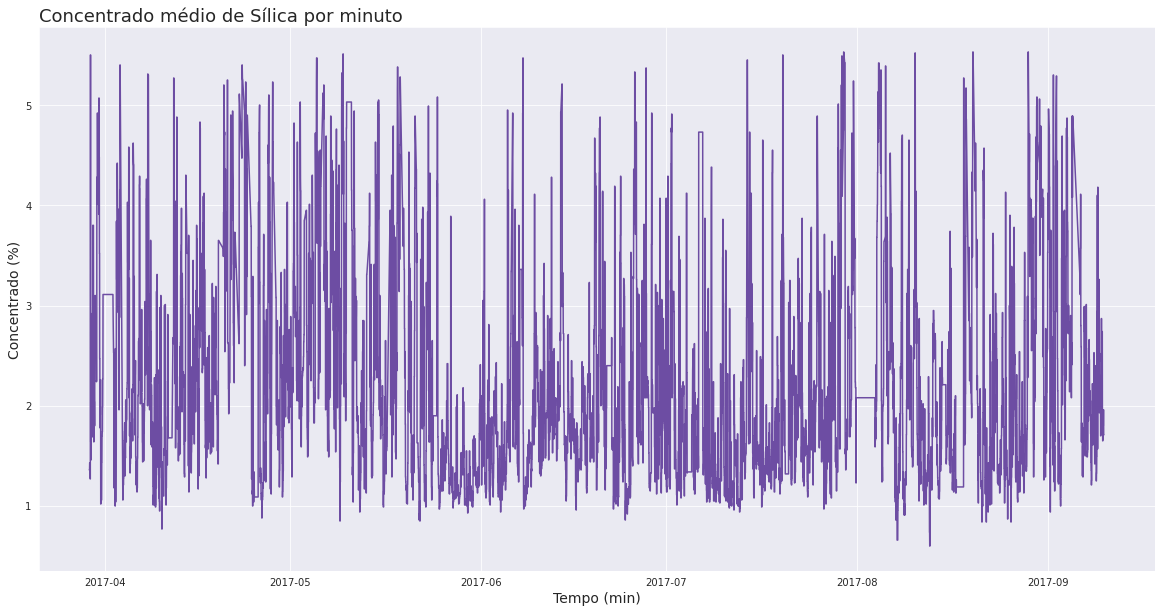

In [19]:
# Plot do Concentrado médio de Sílica por minuto
ax = sns.lineplot(x='date_minutes', y='% Silica Concentrate', data=dados_minuto, color=color_silica)
ax.figure.set_size_inches(20, 10)
ax.set_title('Concentrado médio de Sílica por minuto', loc='left', fontsize=18)
ax.set_xlabel('Tempo (min)', fontsize=14)
ax.set_ylabel('Concentrado (%)', fontsize=14)

ax.plot()

[]

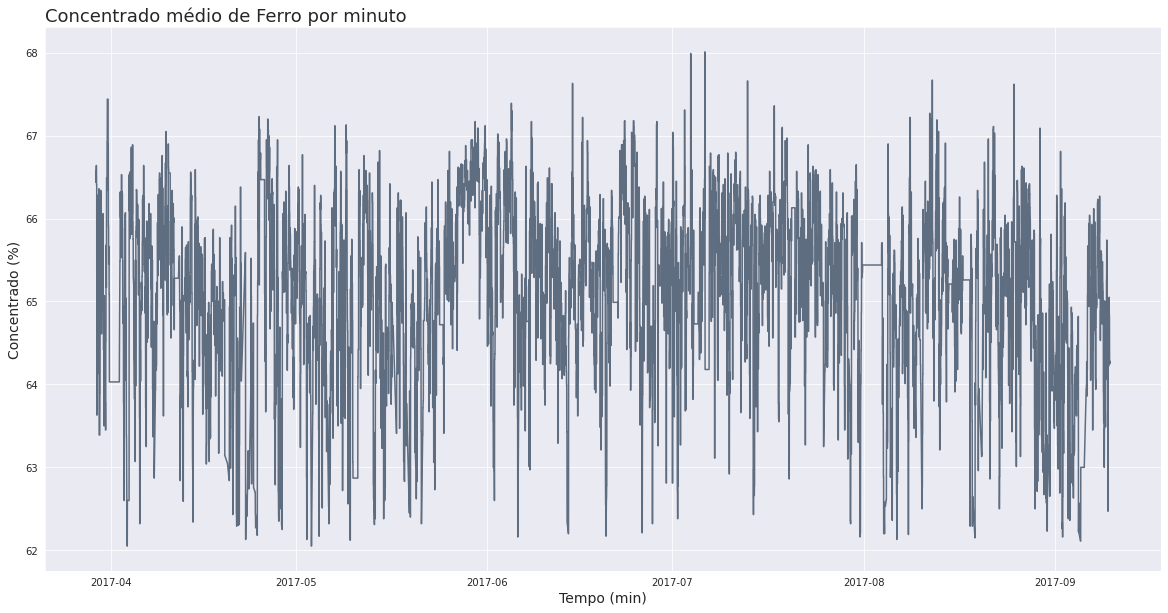

In [20]:
# Plot do Concentrado médio de Ferro por minuto
ax = sns.lineplot(x='date_minutes', y='% Iron Concentrate', data=dados_minuto, color=color_iron)
ax.figure.set_size_inches(20, 10)
ax.set_title('Concentrado médio de Ferro por minuto', loc='left', fontsize=18)
ax.set_xlabel('Tempo (min)', fontsize=14)
ax.set_ylabel('Concentrado (%)', fontsize=14)

ax.plot()

[]

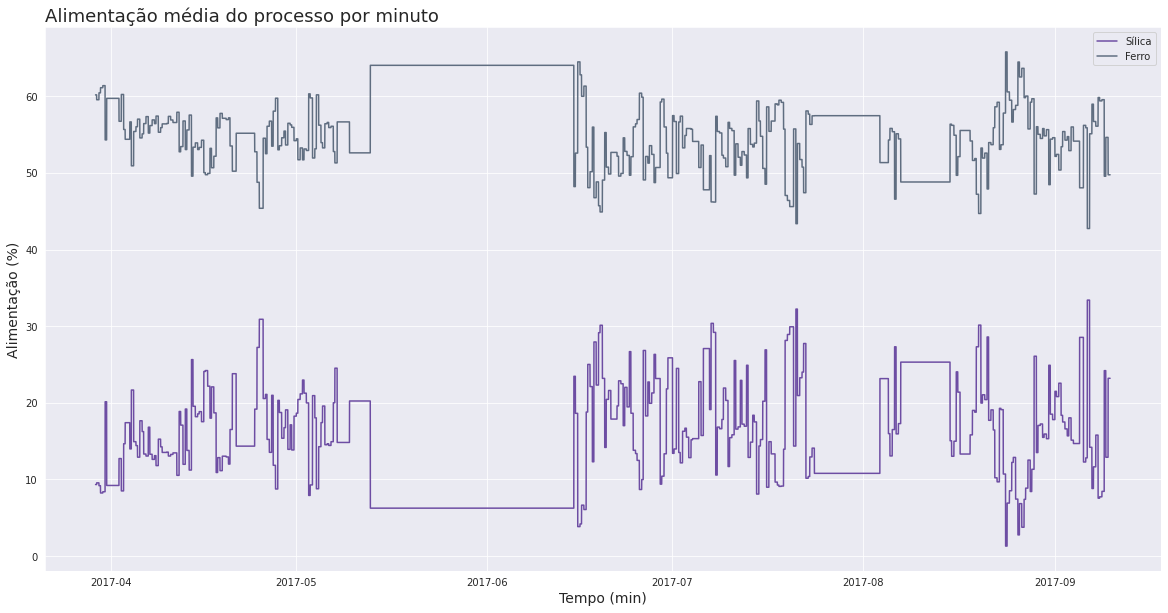

In [21]:
# Plot da alimentação de ferro e sílica 
ax = sns.lineplot(x='date_minutes', y='% Silica Feed', data=dados_minuto, color=color_silica, label='Sílica')
ax = sns.lineplot(x='date_minutes', y='% Iron Feed', data=dados_minuto, color=color_iron, label='Ferro')
ax.figure.set_size_inches(20, 10)
ax.set_title('Alimentação média do processo por minuto', loc='left', fontsize=18)
ax.set_xlabel('Tempo (min)', fontsize=14)
ax.set_ylabel('Alimentação (%)', fontsize=14)
plt.legend(loc='best')
ax.plot()

Com os gráficos abaixo pode-se validar a amostragem horária para o feed de sílica e ferro, pois há um valor único em todos os grupos por hora.

In [22]:
# Agrupando novamente por hora
registros_Hora = dados_segundos.groupby(pd.Grouper(freq='H'))

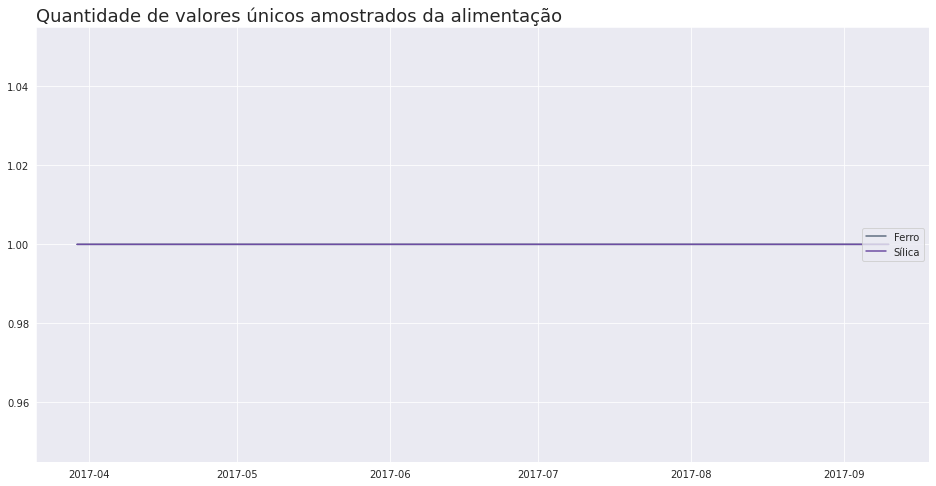

In [23]:
# Preparação do plot
registros_H_Feed = registros_Hora[['% Iron Feed', '% Silica Feed']].apply(lambda x: x[['% Iron Feed', '% Silica Feed']].nunique());

plt.figure(figsize=(16,8));
plt.plot(registros_H_Feed.iloc[:, 0], label='Ferro', color=color_iron);
plt.plot(registros_H_Feed.iloc[:, 1], label='Sílica', color=color_silica);

plt.title('Quantidade de valores únicos amostrados da alimentação', loc='left', fontsize=18);
plt.legend(loc='right')
plt.show()

Não podemos dizer o mesmo para a amostragem do concentrado. 

Há uma variação na quantidade de dados únicos no concentrado de sílica e ferro, agrupados por hora.

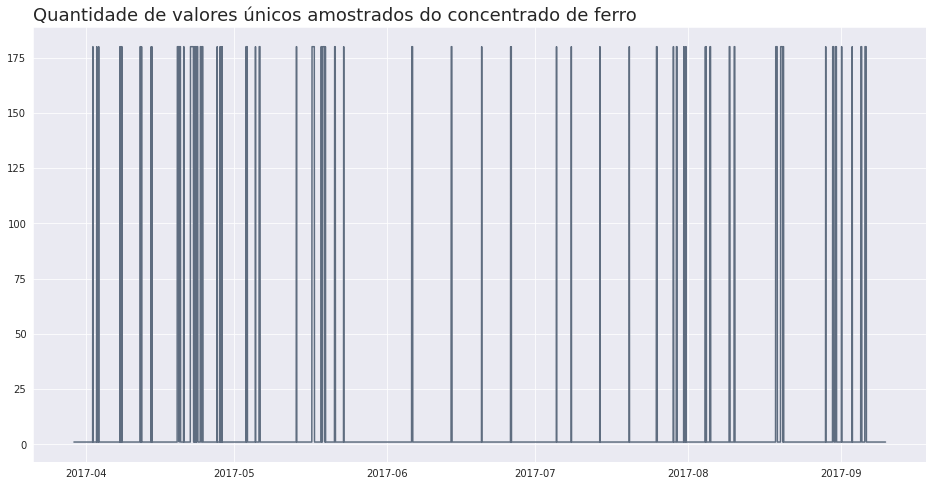

In [24]:
# Preparação do plot de ferro

plt.figure(figsize=(16,8))
registros_H_Concentrate = registros_Hora[['% Iron Concentrate']].apply(lambda x: x[['% Iron Concentrate']].nunique())
#print(registros_H_Concentrate)
plt.plot(registros_H_Concentrate, color=color_iron)
plt.title('Quantidade de valores únicos amostrados do concentrado de ferro', loc='left', fontsize=18)
plt.show()

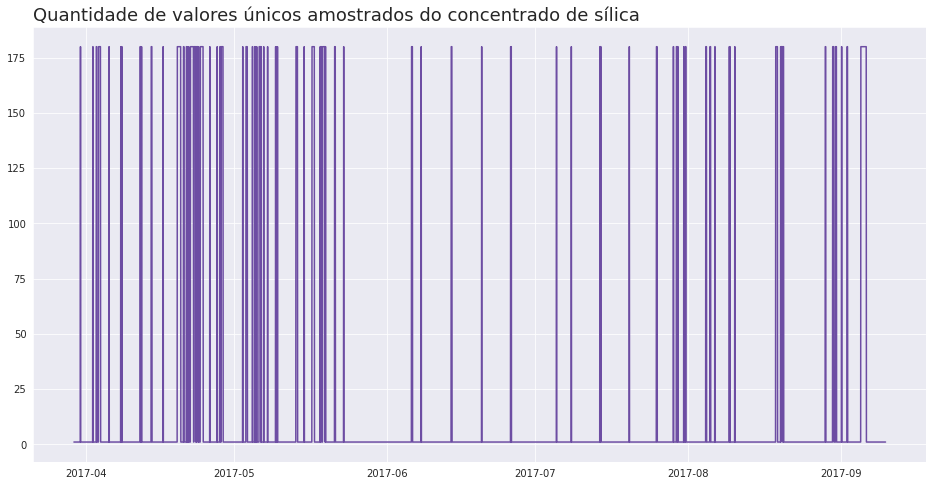

In [25]:
# Preparação do plot de sílica

plt.figure(figsize=(16,8))
registros_H_Concentrate = registros_Hora[['% Silica Concentrate']].apply(lambda x: x[['% Silica Concentrate']].nunique())
#print(registros_H_Concentrate)
plt.plot(registros_H_Concentrate, color=color_silica)
plt.title('Quantidade de valores únicos amostrados do concentrado de sílica', loc='left', fontsize=18)
plt.show()

Selecionando apenas as amostras que variam bastante por hora para análises.

In [26]:
# Gerando os índices das amostragens que variam por hora (Tudo quue for diferente de 1)
horas_variacao = registros_H_Concentrate[registros_H_Concentrate['% Silica Concentrate'] != 1].index
horas_variacao

DatetimeIndex(['2017-03-30 20:00:00', '2017-04-02 08:00:00',
               '2017-04-02 09:00:00', '2017-04-03 01:00:00',
               '2017-04-03 02:00:00', '2017-04-03 03:00:00',
               '2017-04-03 12:00:00', '2017-04-03 13:00:00',
               '2017-04-03 14:00:00', '2017-04-03 15:00:00',
               ...
               '2017-09-05 16:00:00', '2017-09-05 17:00:00',
               '2017-09-05 18:00:00', '2017-09-05 19:00:00',
               '2017-09-05 20:00:00', '2017-09-05 21:00:00',
               '2017-09-05 22:00:00', '2017-09-05 23:00:00',
               '2017-09-06 00:00:00', '2017-09-06 01:00:00'],
              dtype='datetime64[ns]', name='date_seconds', length=309, freq=None)

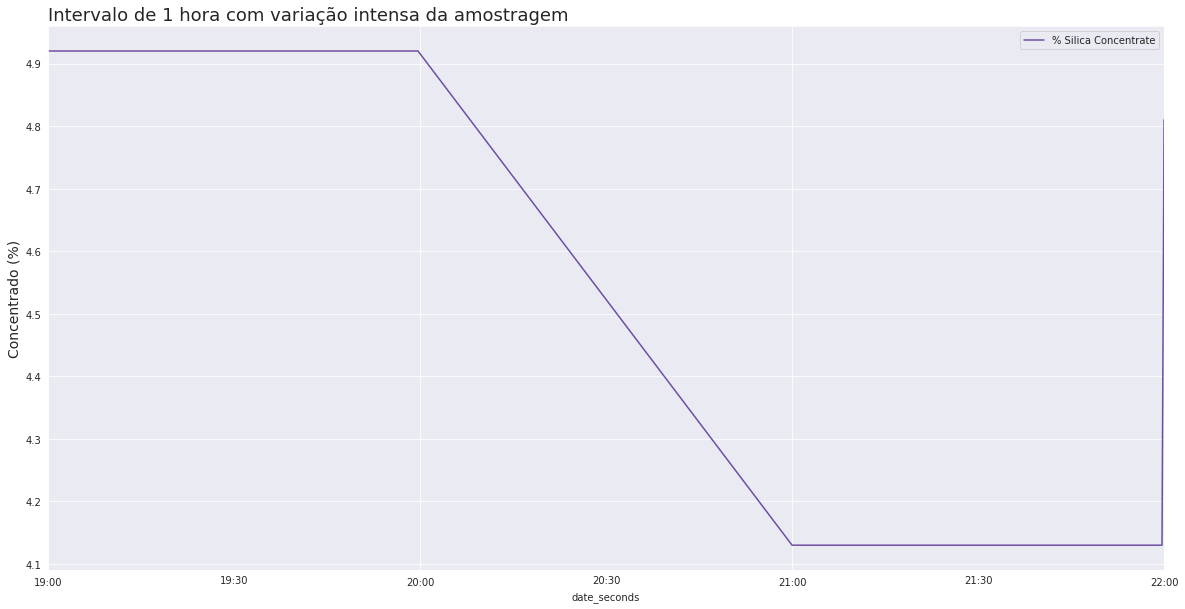

In [27]:
# Plotando um dos horários para verificação

plt.figure(figsize=(20,10))
dados_segundos['% Silica Concentrate']['2017-03-30 19:00:00':'2017-03-30 22:00:00'].plot(label='% Silica Concentrate', color=color_silica)
plt.title('Intervalo de 1 hora com variação intensa da amostragem', loc='left', fontsize=18)
plt.ylabel('Concentrado (%)', fontsize=14)
plt.legend()
plt.show()

Analisado algumas das amostras, agrupados por hora, foi verificado que parece ter ocorrido uma interpolação nas amostras horárias de concentrado de sílica e ferro. 

**- Pode ter ocorrido alguma falta de coleta do dado verdadeiro.** 

Todas essas amostras podem ser mapeadas e contabilizadas para análises do processo.

In [28]:
print(f'Há {horas_variacao.shape[0]} amostras horárias que foram interpoladas.')

Há 309 amostras horárias que foram interpoladas.


#### Analisando as correlações

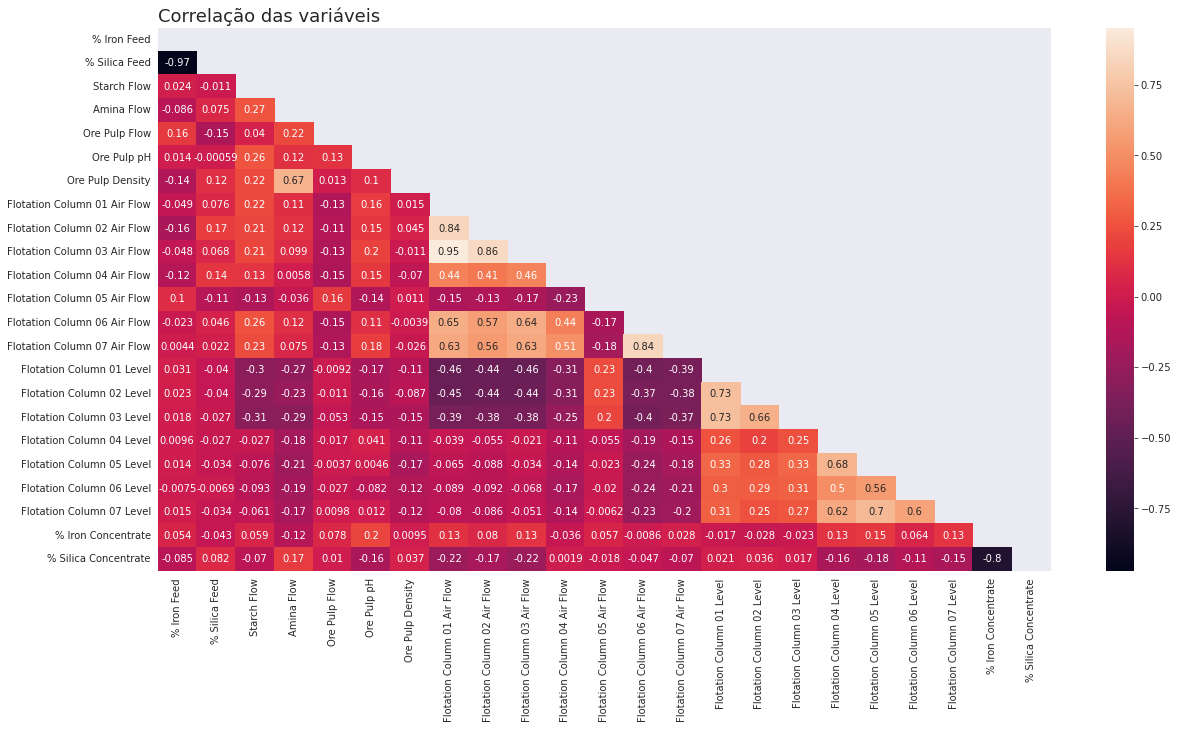

In [29]:
# Correlação
corr = dados_segundos.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot da correlação
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, mask=mask)
plt.title('Correlação das variáveis', loc='left', fontsize=18)
plt.show()

In [30]:
# Ordem das correlações
corr.iloc[-1,:].abs().sort_values(ascending=False)

% Silica Concentrate            1.000000
% Iron Concentrate              0.802067
Flotation Column 03 Air Flow    0.224523
Flotation Column 01 Air Flow    0.224430
Flotation Column 05 Level       0.180860
Flotation Column 02 Air Flow    0.170231
Amina Flow                      0.165368
Flotation Column 04 Level       0.159067
Ore Pulp pH                     0.156999
Flotation Column 07 Level       0.154104
Flotation Column 06 Level       0.109529
% Iron Feed                     0.085432
% Silica Feed                   0.082497
Flotation Column 07 Air Flow    0.070271
Starch Flow                     0.070013
Flotation Column 06 Air Flow    0.046764
Ore Pulp Density                0.037297
Flotation Column 02 Level       0.035959
Flotation Column 01 Level       0.020653
Flotation Column 05 Air Flow    0.017905
Flotation Column 03 Level       0.016650
Ore Pulp Flow                   0.010318
Flotation Column 04 Air Flow    0.001900
Name: % Silica Concentrate, dtype: float64

Analisando as correlações pode ser verificado que: 

- O concentrado de ferro tem uma alta correlação negativa com o concentrado de sílica (O concentrado de ferro será desconsiderado nas modelagens);

- O feed de ferro tem uma alta correlação com o feed de sílica;

- Os atributos definidos como mais importantes do processo **(Starch Flow, Amina Flow, Ore Pulp Flow, Ore Pulp pH, Ore Pulp Density)** não são os mais correlacionados com o concentrado de sílica;

- Existe uma corerrelação alta entre os atributos do processo relacionados às colunas de flotação (Aqui podemos filtrar alguns atributos para modelagem).

- Existe também uma correlação considerável entre o **Amina Flow** e **Ore Pulp Density**. 

In [31]:
# Eliminando o %Iron Concentrate dos dados
dados_minuto.drop('% Iron Concentrate', axis=1, inplace=True)
dados_minuto

% Iron Feed  % Silica Feed  Starch Flow  Amina Flow  \
date_minutes                                                               
2017-03-29 12:00:00        60.18           9.34  2026.126667  353.064000   
2017-03-29 12:01:00        60.18           9.34  2003.920000  362.650333   
2017-03-29 12:02:00        60.18           9.34  2002.193333  367.351333   
2017-03-29 12:03:00        60.18           9.34  2004.746667  369.412333   
2017-03-29 12:04:00        60.18           9.34  2017.040000  373.053667   
...                          ...            ...          ...         ...   
2017-09-09 23:55:00        49.75          23.20  2961.490000  452.658667   
2017-09-09 23:56:00        49.75          23.20  2851.376667  470.843333   
2017-09-09 23:57:00        49.75          23.20  2729.876667  463.040667   
2017-09-09 23:58:00        49.75          23.20  2698.756667  460.303667   
2017-09-09 23:59:00        49.75          23.20  1673.480000  486.685000   

                     Ore Pulp Flow  Ore Pulp pH  Ore Pulp Density  \
date_minutes                                                        
2017-03-29 12:00:00     404.402333     9.741687          1.643469   
2017-03-29 12:01:00     400.681000     9.728623          1.624928   
2017-03-29 12:02:00     401.188333     9.715557          1.606386   
2017-03-29 12:03:00     400.971333     9.702493          1.587845   
2017-03-29 12:04:00     399.969000     9.689427          1.569304   
...                            ...          ...               ...   
2017-09-09 23:55:00     381.784667     9.615990          1.654507   
2017-09-09 23:56:00     384.250000     9.617760          1.654413   
2017-09-09 23:57:00     383.073667     9.619523          1.654070   
2017-09-09 23:58:00     384.490667     9.620873          1.653653   
2017-09-09 23:59:00     384.424333     9.616857          1.653240   

                     Flotation Column 01 Air Flow  \
date_minutes                                        
2017-03-29 12:00:00                    200.131000   
2017-03-29 12:01:00                    199.509333   
2017-03-29 12:02:00                    200.074667   
2017-03-29 12:03:00                    200.216000   
2017-03-29 12:04:00                    200.392333   
...                                           ...   
2017-09-09 23:55:00                    300.351000   
2017-09-09 23:56:00                    299.978667   
2017-09-09 23:57:00                    302.416667   
2017-09-09 23:58:00                    302.603000   
2017-09-09 23:59:00                    302.189000   

                     Flotation Column 02 Air Flow  \
date_minutes                                        
2017-03-29 12:00:00                    196.476333   
2017-03-29 12:01:00                    197.778667   
2017-03-29 12:02:00                    193.330667   
2017-03-29 12:03:00                    194.355000   
2017-03-29 12:04:00                    193.905333   
...                                           ...   
2017-09-09 23:55:00                    295.703667   
2017-09-09 23:56:00                    304.478333   
2017-09-09 23:57:00                    299.060000   
2017-09-09 23:58:00                    299.953333   
2017-09-09 23:59:00                    300.740333   

                     Flotation Column 03 Air Flow  ...  \
date_minutes                                       ...   
2017-03-29 12:00:00                    200.909000  ...   
2017-03-29 12:01:00                    199.034000  ...   
2017-03-29 12:02:00                    202.116333  ...   
2017-03-29 12:03:00                    199.026667  ...   
2017-03-29 12:04:00                    198.702333  ...   
...                                           ...  ...   
2017-09-09 23:55:00                    298.312667  ...   
2017-09-09 23:56:00                    301.176667  ...   
2017-09-09 23:57:00                    299.929000  ...   
2017-09-09 23:58:00                    299.483667  ...   
2017-09-09 23:59:00                    298.719000  ...   


In [32]:
dados_minuto.describe()

% Iron Feed  % Silica Feed    Starch Flow     Amina Flow  \
count  236880.000000  236880.000000  236880.000000  236880.000000   
mean       56.220301      14.767789    2847.013220     488.720680   
std         5.230498       6.886853    1188.254909      90.815389   
min        42.740000       1.310000       0.074147     241.699632   
25%        52.610000       8.812500    2057.135000     432.432917   
50%        55.940000      14.200000    2957.878333     504.809000   
75%        59.720000      20.140000    3696.037500     554.108750   
max        65.780000      33.400000    6295.130657     739.422405   

       Ore Pulp Flow    Ore Pulp pH  Ore Pulp Density  \
count  236880.000000  236880.000000     236880.000000   
mean      397.471409       9.769643          1.679042   
std         9.569969       0.387003          0.068750   
min       376.272600       8.753370          1.519829   
25%       395.033500       9.528765          1.645992   
50%       399.319500       9.798433          1.696187   
75%       402.444750      10.040300          1.726060   
max       418.625439      10.808046          1.853229   

       Flotation Column 01 Air Flow  Flotation Column 02 Air Flow  \
count                 236880.000000                 236880.000000   
mean                     281.287417                    278.182017   
std                       29.575072                     30.014209   
min                      175.666333                    175.923177   
25%                      250.330667                    250.563333   
50%                      299.487000                    297.740667   
75%                      300.149667                    300.526000   
max                      372.387588                    369.550000   

       Flotation Column 03 Air Flow  ...  Flotation Column 06 Air Flow  \
count                 236880.000000  ...                 236880.000000   
mean                     282.253077  ...                    293.659240   
std                       28.415245  ...                     29.283374   
min                      176.471917  ...                    192.261000   
25%                      250.938667  ...                    294.929333   
50%                      299.139000  ...                    299.718000   
75%                      300.360667  ...                    301.534667   
max                      359.948635  ...                    368.052586   

       Flotation Column 07 Air Flow  Flotation Column 01 Level  \
count                 236880.000000              236880.000000   
mean                     292.293598                 520.425285   
std                       27.532251                 131.607910   
min                      186.074077                 149.451600   
25%                      291.970583                 411.630583   
50%                      299.473667                 492.581167   
75%                      301.384750                 596.108417   
max                      370.190800                 862.197932   

       Flotation Column 02 Level  Flotation Column 03 Level  \
count              236880.000000              236880.000000   
mean                  523.195900                 532.182319   
std                   127.329859                 152.500390   
min                   211.266111                 126.352031   
25%                   441.896417                 408.474250   
50%                   496.522500                 494.585500   
75%                   596.604167                 601.851167   
max                   828.551600                 886.820204   

       Flotation Column 04 Level  Flotation Column 05 Level  \
count              236880.000000              236880.000000   
mean                  418.095664                 422.776637   
std                    89.508061                  82.917117   
min                   162.293185                 167.139620   
25%                   355.663250                 356.155917   
50%                   407.528667           

Com os descritivo dos dados acima é percebido a necessidade da normalização antes de aplicar um modelo de predição, pois os dados estão em escalas diferentes.

#### Feature selection

In [46]:
feature_names = dados_segundos.columns
feature_names

Index(['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate'],
      dtype='object')

##### Análise com PCA

Vou utilizar o PCA para tentar encontrar as componentes principais dos dados, que são muitos, variam bastante e não possuem uma correlação muito clara com o concentrado de sílica. É um dataset não tão simples de analisar no seu formato original.

Com o PCA os quantidade de variáveis pode ser reduzida preservando  variância original entre os dados.

In [34]:
# Importando métodos e criando um novo X para trabalhar com o pca
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Criando o novo X para separa as análises
X_pca = dados_minuto.iloc[:, :-1]

# Escalar os dados é necessário ao usar o PCA
scaler_pca = StandardScaler()

# Treino do pca
X_pca = scaler_pca.fit_transform(X_pca)

In [35]:
# Criando objeto
pca = PCA()

In [36]:
# Realizando o fit
pca.fit(X_pca)

PCA()

In [37]:
# shape com 21 componentes pra cada feature
pca.components_.shape

(21, 21)

In [38]:
# Variância explicada
np.round(pca.explained_variance_ratio_, 3)

array([0.287, 0.14 , 0.099, 0.089, 0.059, 0.05 , 0.047, 0.035, 0.034,
       0.028, 0.026, 0.022, 0.016, 0.015, 0.013, 0.012, 0.011, 0.008,
       0.005, 0.002, 0.001])

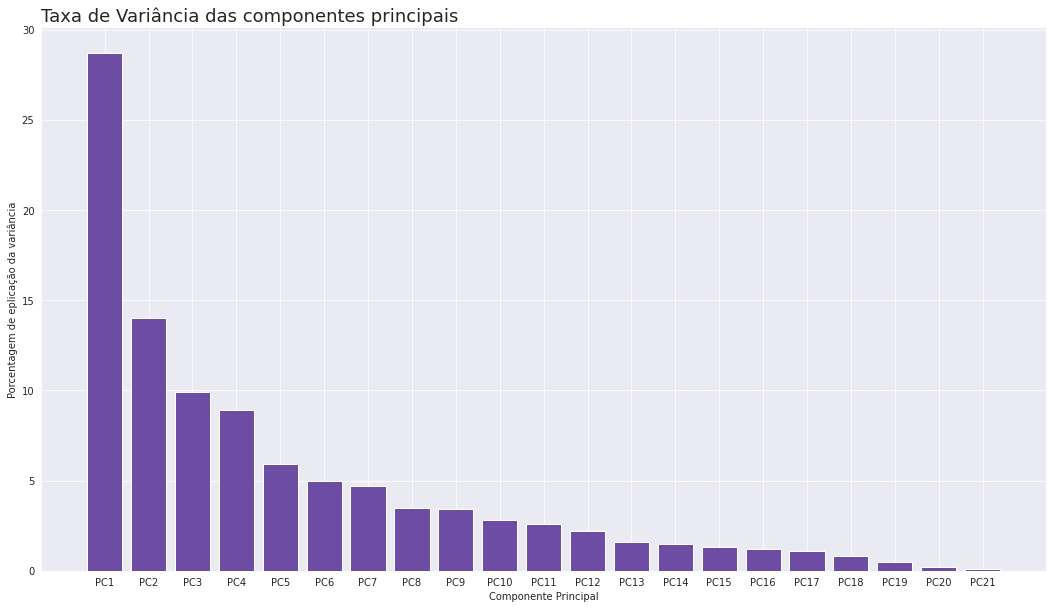

In [39]:
# Variância explicada
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.figure(figsize=(18,10))
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels, color=color_silica)
plt.plot(color=color_silica)
plt.ylabel('Porcentagem de eplicação da variância')
plt.xlabel('Componente Principal')
plt.title('Taxa de Variância das componentes principais', loc='left', fontsize=18)
plt.show()

In [40]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.90) +1

print(f'É preciso 15 componentes para preservar pelo menos 90% da variabilidade dos dados')

É preciso 15 componentes para preservar pelo menos 90% da variabilidade dos dados


In [41]:
# Testando um novo pca com 15 componentes
pca = PCA(n_components=15)

pca.fit(X_pca)

# Variância explicada
np.round(pca.explained_variance_ratio_, 3)

array([0.287, 0.14 , 0.099, 0.089, 0.059, 0.05 , 0.047, 0.035, 0.034,
       0.028, 0.026, 0.022, 0.016, 0.015, 0.013])

In [42]:
print(f'Valores singulares dos 15 componentes:\n{pca.singular_values_}')

Valores singulares dos 15 componentes:
[1194.32254642  835.57016592  701.80769599  663.82946139  542.54112938
  496.61830685  485.43068897  419.52923877  408.93944164  374.04157777
  359.39310843  328.08445415  285.75115637  274.05617453  257.5114859 ]


In [43]:
pca.components_.shape

(15, 21)

In [44]:
# Valores do primeiro componente para cada variável
pca.components_[1,:]

array([-0.05099354,  0.05074193, -0.00388053, -0.20738028, -0.13095694,
        0.0483389 , -0.189351  ,  0.25253144,  0.22799522,  0.27179981,
        0.12662323, -0.11325105,  0.11414698,  0.14273328,  0.07935367,
        0.04734129,  0.10375642,  0.39994278,  0.41847722,  0.36291414,
        0.39810146])

In [45]:
# Matriz das componentes Principais relacionadas a cada variável para análises futuras

pd.DataFrame(data=pca.components_, columns=dados_minuto.columns[:-1], index=[f'PCA {i}' for i in range(1,16)])

% Iron Feed  % Silica Feed  Starch Flow  Amina Flow  Ore Pulp Flow  \
PCA 1      0.045880      -0.056266    -0.160459   -0.126995       0.040964   
PCA 2     -0.050994       0.050742    -0.003881   -0.207380      -0.130957   
PCA 3     -0.664299       0.657006    -0.037654    0.131547      -0.159674   
PCA 4     -0.055267       0.068716    -0.342938   -0.469680      -0.297240   
PCA 5     -0.042793       0.046465     0.066807   -0.284635      -0.065244   
PCA 6      0.089092      -0.083712     0.304775    0.034995      -0.323529   
PCA 7     -0.153134       0.180319     0.027091   -0.155875       0.600541   
PCA 8      0.063169      -0.066205    -0.655757    0.286722       0.360456   
PCA 9     -0.072473       0.083416     0.360664    0.091610       0.385205   
PCA 10    -0.015089       0.030710     0.246604   -0.054765       0.202744   
PCA 11    -0.064624       0.054462    -0.358699   -0.002095      -0.084793   
PCA 12     0.008912      -0.007042    -0.070895   -0.008895      -0.048270   
PCA 13     0.007115      -0.000663    -0.029664   -0.129320       0.080264   
PCA 14    -0.002331       0.018829    -0.006499    0.142228      -0.029847   
PCA 15    -0.010394      -0.001873    -0.001694    0.454445      -0.164994   

        Ore Pulp pH  Ore Pulp Density  Flotation Column 01 Air Flow  \
PCA 1     -0.102560         -0.064946                     -0.319232   
PCA 2      0.048339         -0.189351                      0.252531   
PCA 3     -0.043692          0.210040                     -0.047932   
PCA 4     -0.271016         -0.431416                      0.032017   
PCA 5      0.128194         -0.341029                     -0.225369   
PCA 6      0.424735          0.180346                     -0.129457   
PCA 7      0.583216         -0.318579                     -0.004944   
PCA 8     -0.057562          0.105952                      0.024682   
PCA 9     -0.522847         -0.153026                     -0.187705   
PCA 10    -0.065962         -0.158230                      0.174368   
PCA 11     0.229378          0.016040                     -0.125221   
PCA 12     0.172808          0.028873                     -0.073426   
PCA 13     0.009316          0.135086                     -0.006611   
PCA 14     0.023413         -0.074067                     -0.058188   
PCA 15     0.043615         -0.388342                      0.020227   

        Flotation Column 02 Air Flow  Flotation Column 03 Air Flow  ...  \
PCA 1                      -0.307663                     -0.317136  ...   
PCA 2                       0.227995                      0.271800  ...   
PCA 3                       0.034055                     -0.053314  ...   
PCA 4                       0.020836                      0.027260  ...   
PCA 5                      -0.213072                     -0.203682  ...   
PCA 6                      -0.187468                     -0.117927  ...   
PCA 7                       0.021472                      0.014310  ...   
PCA 8                      -0.004300                      0.040151  ...   
PCA 9                      -0.204935                     -0.206957  ...   
PCA 10                      0.212345                      0.166771  ...   
PCA 11                     -0.169869                     -0.126278  ...   
PCA 12                     -0.079535                     -0.052305  ...   
PCA 13                      0.008395                     -0.038513  ...   
PCA 14                     -0.063010                     -0.052856  ...   
PCA 15                     -0.120216                      0.058281  ...   

        Flotation Column 05 Air Flow  Flotation Column 06 Air Flow  \
PCA 1                       0.112152                     -0.314582   
PCA 2                      -0.113251                      0.114147   
PCA 3                      -0.089001                     -0.071698   
PCA 4                       0.062915                      0.141957   
PCA 5                      -0.528605                     -0.180396   
P

Uma opção interessante para estudo é separar os dados de concentração de sílica em faixas e identificar/estudar as influências das compoentes para os agrupamentos.

##### Análise com regressão

Como as principais variáveis do problema são **(Starch Flow, Amina Flow, Ore Pulp Flow, Ore Pulp pH, Ore Pulp Density)**, irei escolher métodos de feature selection que eu possa interpretar o resultado e determinar se os atributos estão dentro do grupo definido acima.

Irei analisar a importância dos atributos usando seleção de features com teste estatístico de regressão e selecionar as 15 melhores features. Escolhi esse valor para teste com base no PCA.

K-Best Selection

In [47]:
X = dados_minuto.iloc[:, :-1]
y = dados_minuto.iloc[:, -1]

In [48]:
from sklearn.feature_selection import SelectKBest, f_regression

In [49]:
# Definindo k = 10 para filtrar os melhores atributos
k=15

k_best = SelectKBest(f_regression, k=k).fit(X, y)

In [50]:
# pegando os melhores atributos e guardando os nomes para filtrar o dataset
names_best = k_best.get_feature_names_out()
print(f'Os {k} melhores atributos são:\n\n{names_best}')

Os 15 melhores atributos são:

['% Iron Feed' '% Silica Feed' 'Starch Flow' 'Amina Flow' 'Ore Pulp pH'
 'Ore Pulp Density' 'Flotation Column 01 Air Flow'
 'Flotation Column 02 Air Flow' 'Flotation Column 03 Air Flow'
 'Flotation Column 06 Air Flow' 'Flotation Column 07 Air Flow'
 'Flotation Column 04 Level' 'Flotation Column 05 Level'
 'Flotation Column 06 Level' 'Flotation Column 07 Level']


In [51]:
#best_features_selected = ['% Iron Feed', 'Starch Flow', 'Amina Flow', 'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
#                           'Flotation Column 01 Air Flow', 'Flotation Column 04 Level']

best_features_selected = names_best

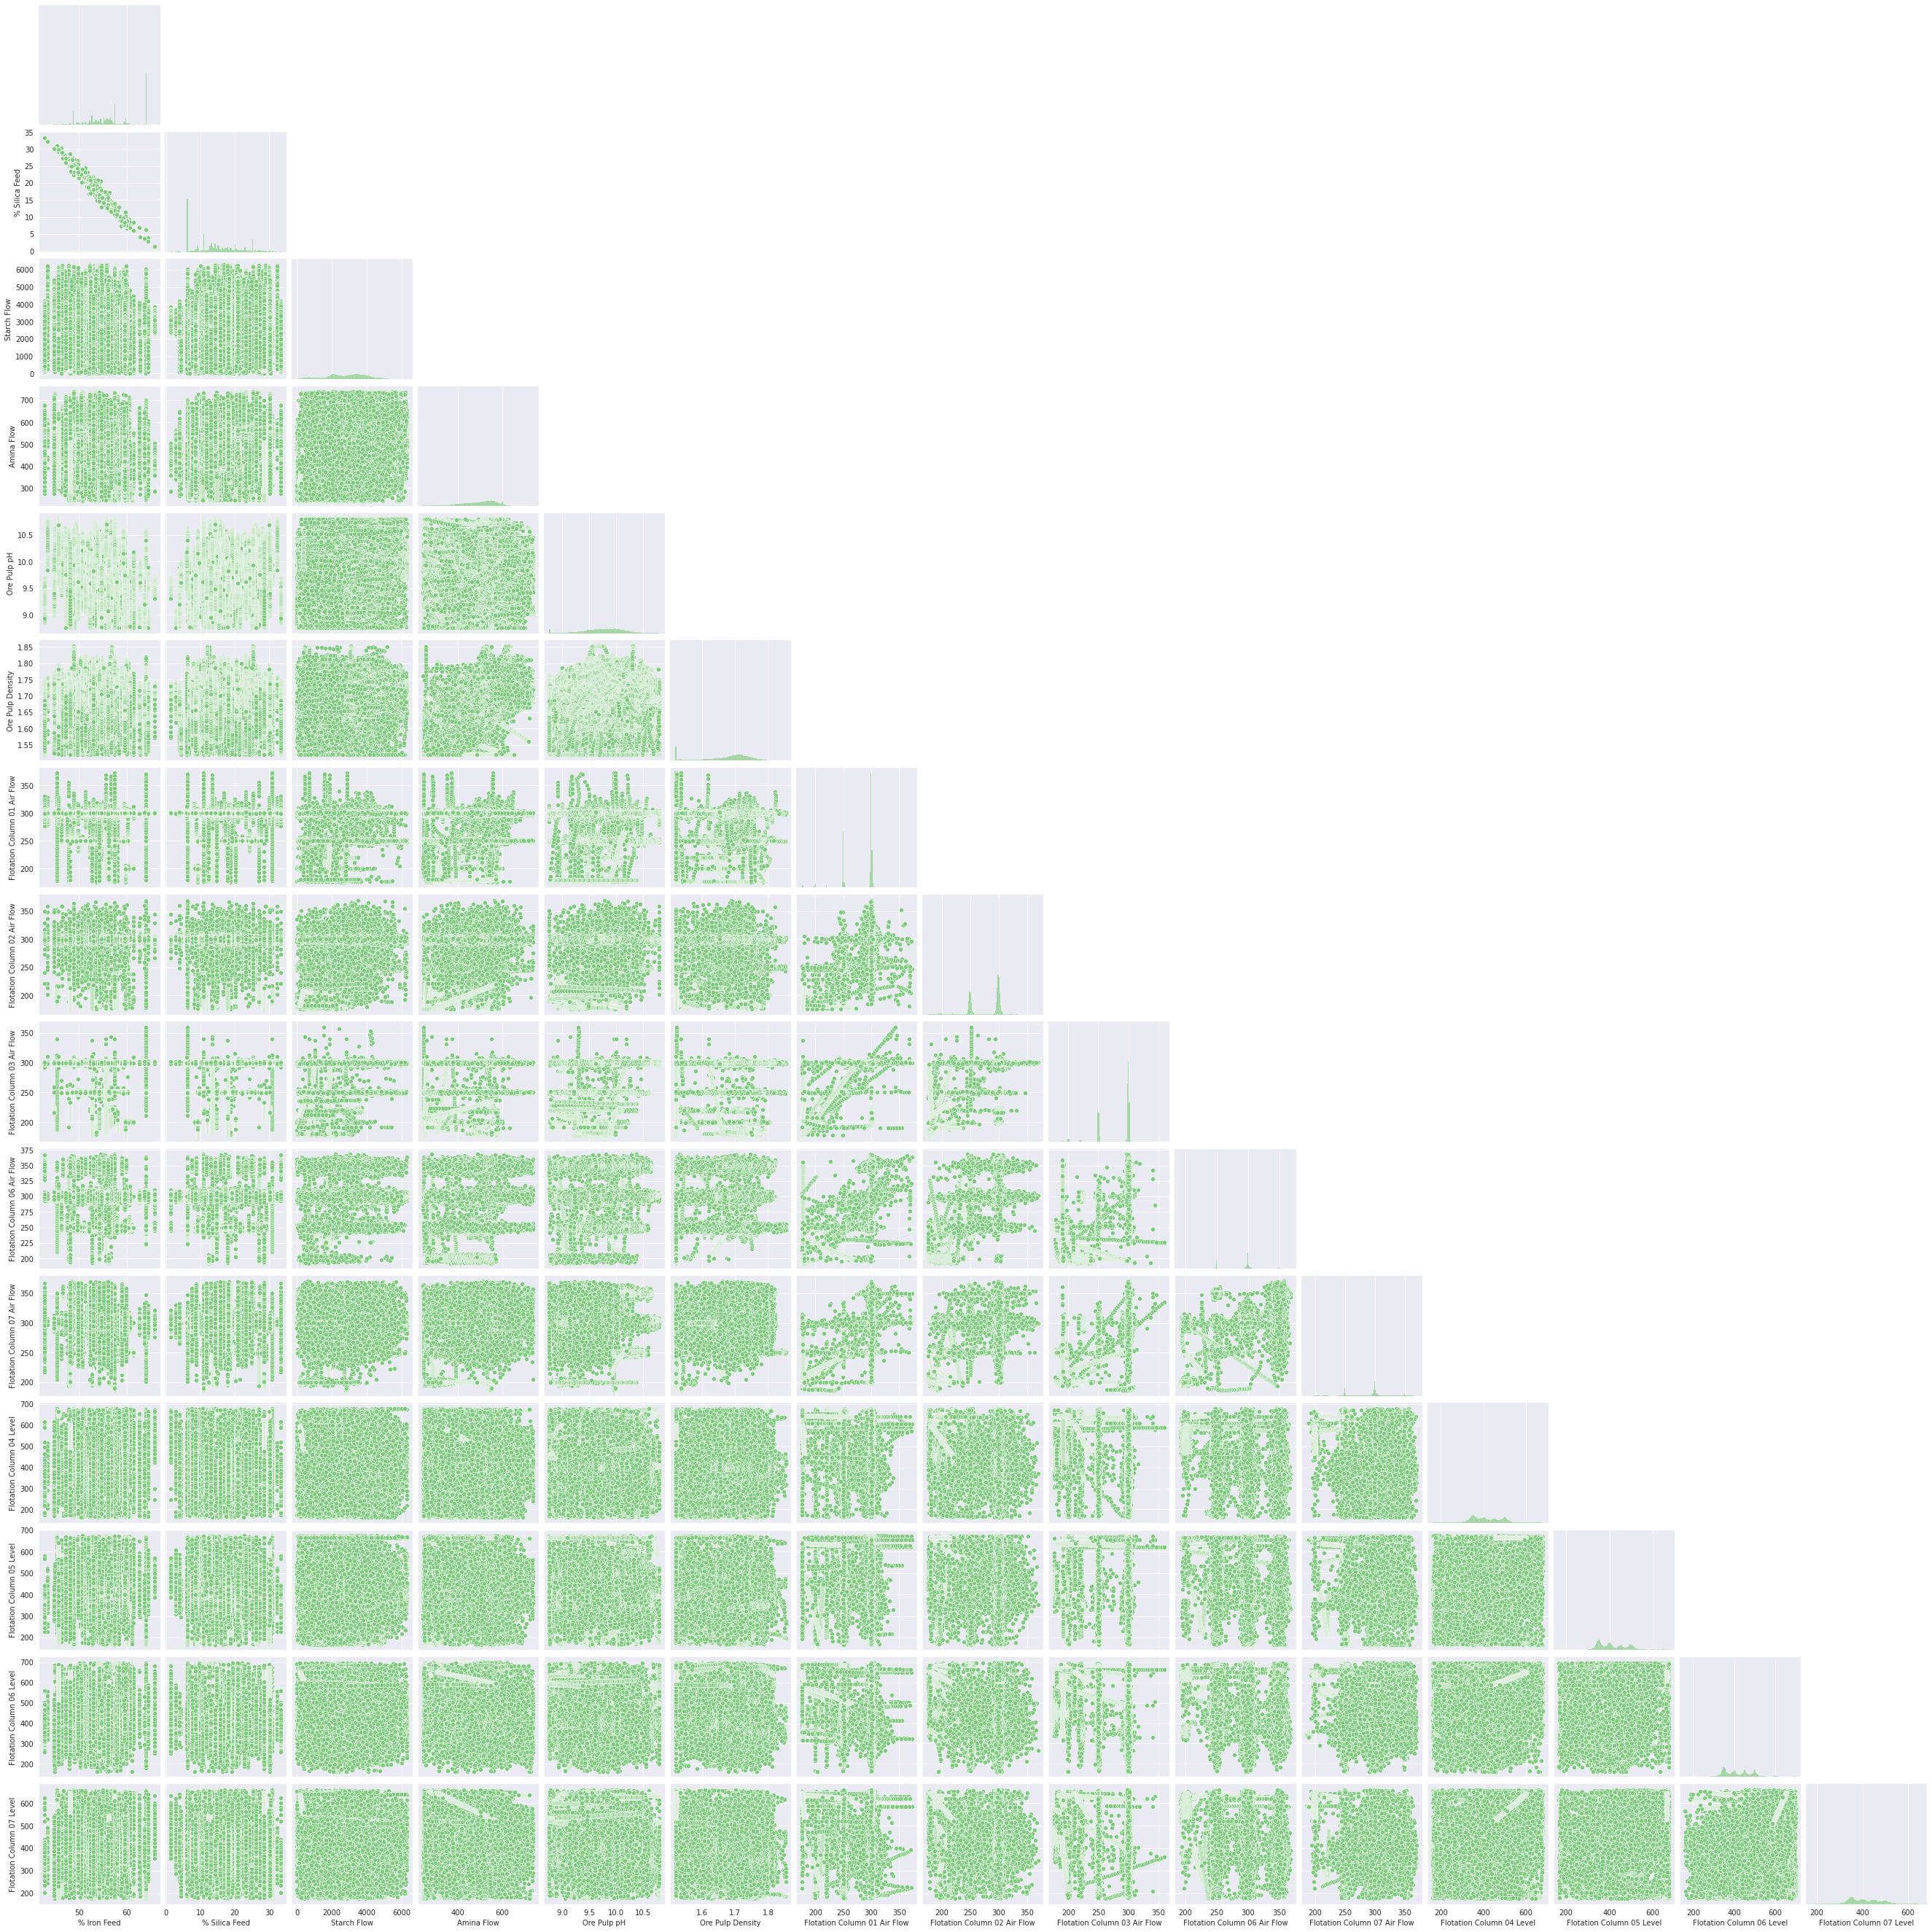

In [52]:
ax = sns.pairplot(dados_minuto[best_features_selected], corner=True)
plt.plot(color=color_silica)
plt.show()

#### Análise da série temporal do concentrado de sílica

In [53]:
silica_conc = pd.Series(data=dados_minuto['% Silica Concentrate'], index=dados_minuto.index)

[]

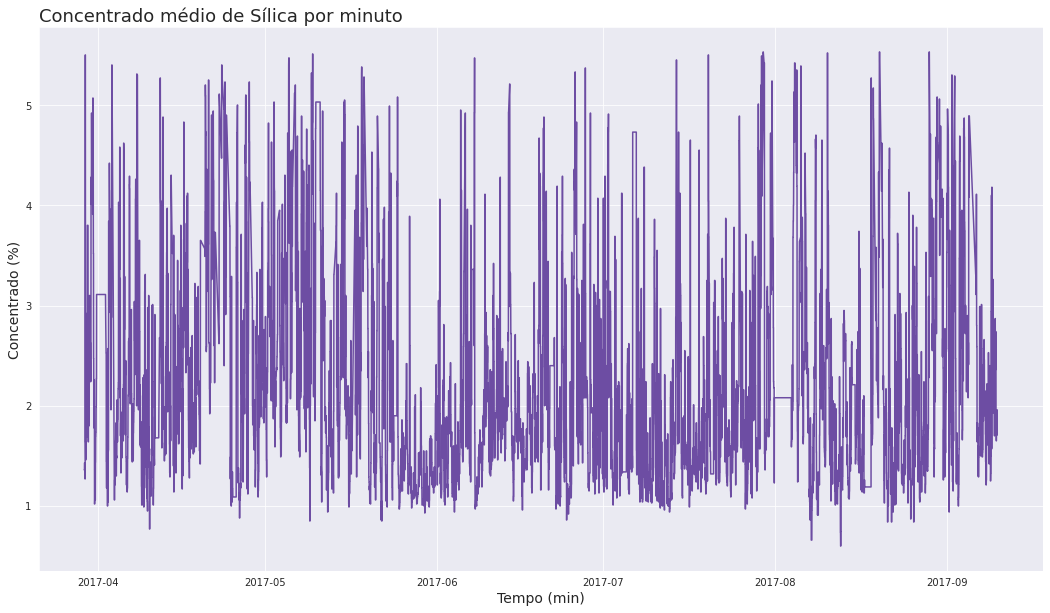

In [54]:
# Plot

ax = sns.lineplot(data=silica_conc, color=color_silica)
ax.figure.set_size_inches(18, 10)
ax.set_title('Concentrado médio de Sílica por minuto', loc='left', fontsize=18)
ax.set_xlabel('Tempo (min)', fontsize=14)
ax.set_ylabel('Concentrado (%)', fontsize=14)

ax.plot()

[]

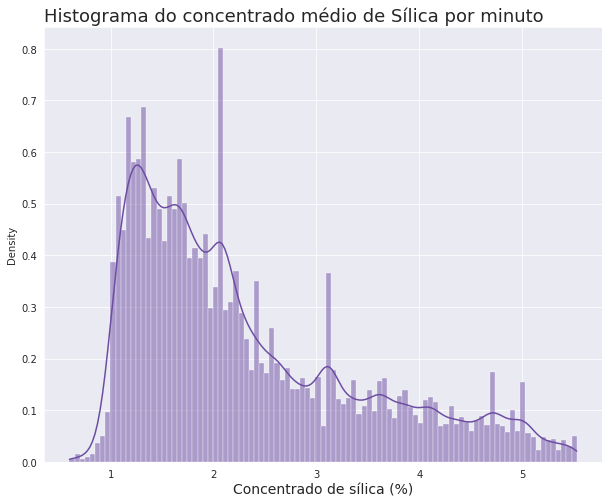

In [55]:
# Histograma

ax = sns.histplot(dados_minuto['% Silica Concentrate'], color=color_silica, kde=True, stat='density')
ax.figure.set_size_inches(10,8)

ax.set_title('Histograma do concentrado médio de Sílica por minuto', loc='left', fontsize=18)
ax.set_xlabel('Concentrado de sílica (%)', fontsize=14)

ax.plot()

Com o gráfico da autocorerlação abaixo pode ser visto que os dados mais correlacionados são os primeiros.

[]

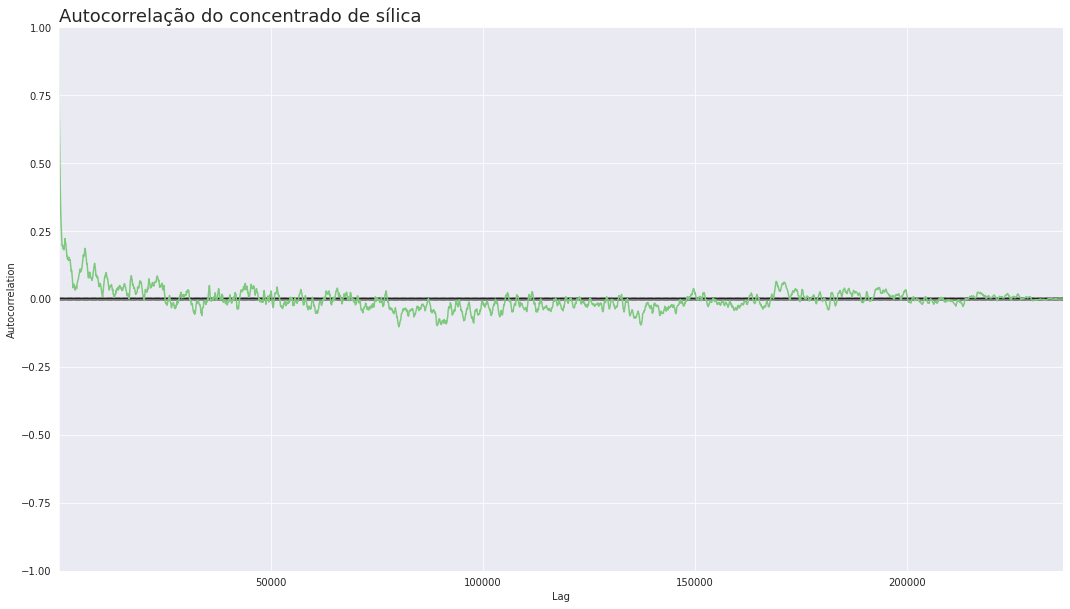

In [ ]:
# autocorrelation_plot

from pandas.plotting import autocorrelation_plot

ax = autocorrelation_plot(dados_minuto['% Silica Concentrate'])
ax.figure.set_size_inches(18, 10)
ax.set_title('Autocorrelação do concentrado de sílica', loc='left', fontsize=18)
ax.grid(True)
ax.plot(color=color_silica)

Usando o plot do statsmodel é possível ter uma análise melhor da autocorrelação, filtrando a quantidade de lags.

Com o gráfico abaixo verifica-se uma autocorerlação de aproximadamente 0.2 até próximo do lag 1000.

Considerando que 1h = 60 min, temos uma autocorrelação acima de 0.2 entre uma amostra atual e as amostras das últimas 15h, aproximadamente.

In [59]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


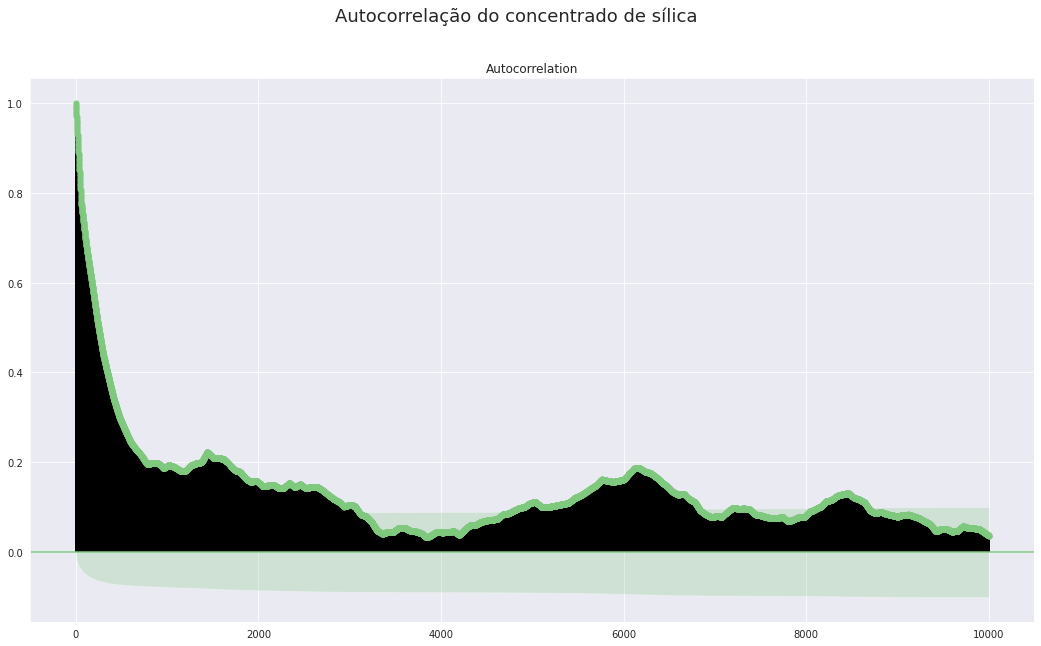

In [ ]:
# Plot da autocorrelação
ax = plot_acf(dados_minuto['% Silica Concentrate'], lags=10000)
ax.suptitle('Autocorrelação do concentrado de sílica', size=18)
ax.set_size_inches(18, 10)

A Autocorrelação parcial pode identificar os melhores lags relacionados, já que ela elimina as relações indiretas e mostra a correlação direta entre um valor atual os lags.

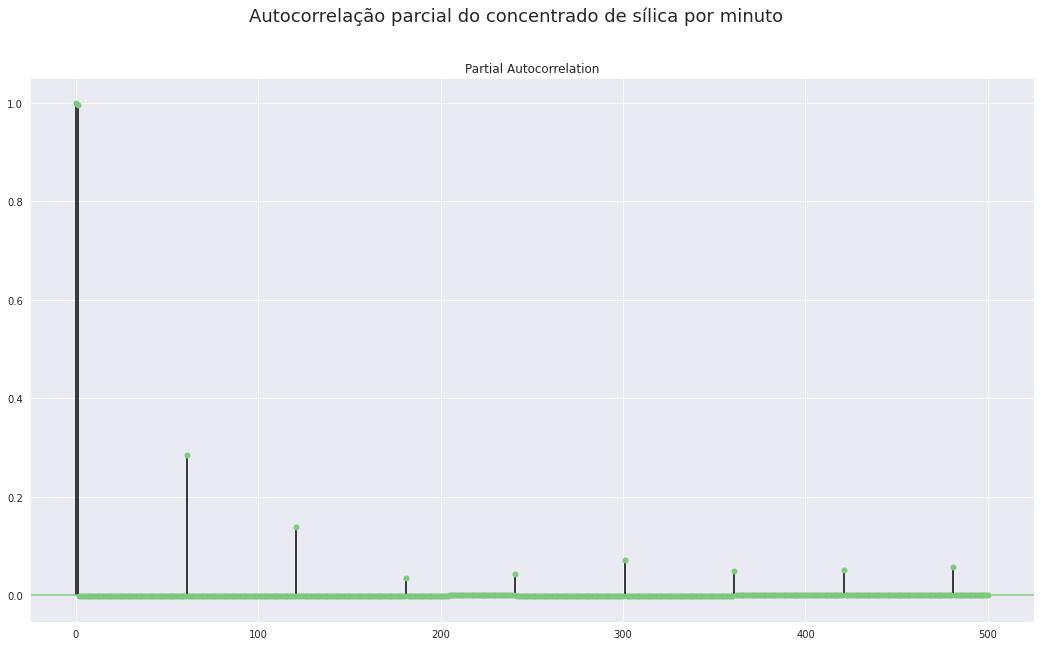

In [ ]:
# Plot da autocorrelação Parcial

ax = plot_pacf(dados_minuto['% Silica Concentrate'], lags=500)
ax.suptitle('Autocorrelação parcial do concentrado de sílica por minuto', size=18)
ax.set_size_inches(18, 10)

Interessante, parecer haver uma alta relevância entre as amostras de 60 em 60 minutos, ou seja, 1 hora.

Vamos olhar para os valores médios por hora e ver o que encontramos...

In [56]:
# Criando o dataset horário e formatando o index
dados_hora = dados_segundos.groupby(pd.Grouper(freq='H')).mean()
dados_hora.index.name = 'date_hour'
dados_hora.drop('% Iron Concentrate', axis=1, inplace=True)
dados_hora.head()

% Iron Feed  % Silica Feed  Starch Flow  Amina Flow  \
date_hour                                                                  
2017-03-29 12:00:00        60.18           9.34  1060.859297  379.836203   
2017-03-29 13:00:00        60.18           9.34  2034.926525  322.233975   
2017-03-29 14:00:00        60.18           9.34  1435.425811  474.656322   
2017-03-29 15:00:00        60.18           9.34   618.460387  396.377733   
2017-03-29 16:00:00        59.54           9.56  1367.502858  317.134072   

                     Ore Pulp Flow  Ore Pulp pH  Ore Pulp Density  \
date_hour                                                           
2017-03-29 12:00:00     400.982539     9.527187          1.550374   
2017-03-29 13:00:00     400.468947     9.700679          1.532017   
2017-03-29 14:00:00     399.157083     9.687788          1.645200   
2017-03-29 15:00:00     398.942522     9.851689          1.559929   
2017-03-29 16:00:00     400.836283     9.936163          1.530984   

                     Flotation Column 01 Air Flow  \
date_hour                                           
2017-03-29 12:00:00                    200.035839   
2017-03-29 13:00:00                    199.990122   
2017-03-29 14:00:00                    200.019311   
2017-03-29 15:00:00                    199.940833   
2017-03-29 16:00:00                    199.878922   

                     Flotation Column 02 Air Flow  \
date_hour                                           
2017-03-29 12:00:00                    195.577700   
2017-03-29 13:00:00                    195.106250   
2017-03-29 14:00:00                    195.604928   
2017-03-29 15:00:00                    195.657094   
2017-03-29 16:00:00                    196.162864   

                     Flotation Column 03 Air Flow  ...  \
date_hour                                          ...   
2017-03-29 12:00:00                    199.983717  ...   
2017-03-29 13:00:00                    199.765344  ...   
2017-03-29 14:00:00                    199.925800  ...   
2017-03-29 15:00:00                    200.044339  ...   
2017-03-29 16:00:00                    199.905467  ...   

                     Flotation Column 06 Air Flow  \
date_hour                                           
2017-03-29 12:00:00                    250.069722   
2017-03-29 13:00:00                    250.029056   
2017-03-29 14:00:00                    249.979356   
2017-03-29 15:00:00                    249.978589   
2017-03-29 16:00:00                    250.061661   

                     Flotation Column 07 Air Flow  Flotation Column 01 Level  \
date_hour                                                                      
2017-03-29 12:00:00                    249.992956                 753.724247   
2017-03-29 13:00:00                    250.059711                 848.675503   
2017-03-29 14:00:00                    250.111328                 851.951492   
2017-03-29 15:00:00                    250.028506                 855.910630   
2017-03-29 16:00:00                    250.122067                 851.603513   

                     Flotation Column 02 Level  Flotation Column 03 Level  \
date_hour                                                                   
2017-03-29 12:00:00                 726.559437                 860.557818   
2017-03-29 13:00:00                 777.784437                 869.419421   
2017-03-29 14:00:00                 776.293654                 879.704989   
2017-03-29 15:00:00                 780.369869                 882.093896   
2017-03-29 16:00:00                 784.446084                 884.840698   

                     Flotation Column 04 Level  Flotation Column 05 Level  \
date_hour                                                                   
2017-03-29 12:00:00                 477.349197                 452.512522   
2017-03-29 13:00:00                 483.816131                 469.448172   
2017-03-29 14:00:00                 456.147231                 453.22700

In [57]:
dados_hora.describe()

% Iron Feed  % Silica Feed  Starch Flow   Amina Flow  Ore Pulp Flow  \
count  3948.000000    3948.000000  3948.000000  3948.000000    3948.000000   
mean     56.220301      14.767789  2847.012956   488.720690     397.471417   
std       5.231150       6.887711   948.913479    83.769854       8.491449   
min      42.740000       1.310000    54.595483   242.927477     376.837604   
25%      52.610000       8.812500  2146.232399   436.428747     398.774394   
50%      55.940000      14.200000  2880.359057   502.685958     399.835435   
75%      59.720000      20.140000  3514.789670   550.144572     400.592916   
max      65.780000      33.400000  6270.158798   736.982378     418.070232   

       Ore Pulp pH  Ore Pulp Density  Flotation Column 01 Air Flow  \
count  3948.000000       3948.000000                   3948.000000   
mean      9.769643          1.679042                    281.287417   
std       0.378012          0.063417                     29.361843   
min       8.753389          1.519926                    175.885579   
25%       9.542790          1.649868                    250.109687   
50%       9.796511          1.694900                    299.850578   
75%      10.033416          1.719869                    299.955660   
max      10.807370          1.818191                    312.295415   

       Flotation Column 02 Air Flow  Flotation Column 03 Air Flow  ...  \
count                   3948.000000                   3948.000000  ...   
mean                     278.182019                    282.253076  ...   
std                       29.490104                     28.244196  ...   
min                      178.188430                    177.202665  ...   
25%                      250.119040                    250.109164  ...   
50%                      299.596767                    299.893233  ...   
75%                      299.991808                    299.948658  ...   
max                      309.887767                    302.783000  ...   

       Flotation Column 06 Air Flow  Flotation Column 07 Air Flow  \
count                   3948.000000                   3948.000000   
mean                     293.659240                    292.293595   
std                       28.978371                     26.527575   
min                      196.512082                    199.728122   
25%                      299.193321                    299.031694   
50%                      299.885686                    299.876333   
75%                      300.113490                    300.129489   
max                      354.979117                    351.268656   

       Flotation Column 01 Level  Flotation Column 02 Level  \
count                3948.000000                3948.000000   
mean                  520.425277                 523.195899   
std                   123.756672                 116.664614   
min                   181.925623                 224.909663   
25%                   409.067986                 449.187215   
50%                   499.582128                 499.840739   
75%                   599.849921                 599.424594   
max                   859.025062                 827.775874   

       Flotation Column 03 Level  Flotation Column 04 Level  \
count                3948.000000                3948.000000   
mean                  532.182319                 418.095661   
std                   140.549112                  76.142141   
min                   135.214506                 165.725058   
25%                   402.250428                 351.264361   
50%                   499.584794                 400.834364   
75%                   600.303602                 494.603949   
max                   884.840698                 675.631942   

       Flotation Column 05 Level  Flotation Column 06 Level  \
count                3948.000000                3948.000000   
mean                  422.776652                 426.996977   
std                    74.612107                  74.714161

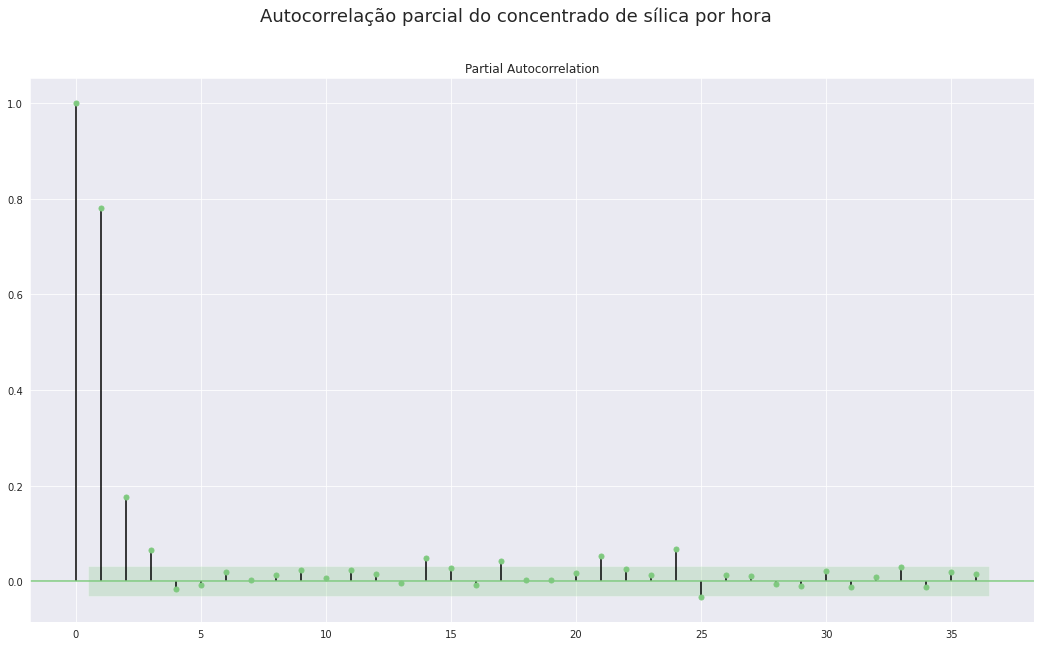

In [60]:
ax = plot_pacf(dados_hora['% Silica Concentrate'])
ax.set_size_inches(18, 10)
ax.suptitle('Autocorrelação parcial do concentrado de sílica por hora', size=18)
ax.show()

O gráfico acima nos mostra que os dados médios das últimas 3 horas tem uma relevânica no valor médio da hora atual. 

Como a relevância da hora anterior é muito mais relevante do que os outros, ireri considerar um lag de 1 hora para o modelo de predição.

Assim, podemos considerar os horários médios por hora, mantendo as informações mais relevantes para o problema.

[]

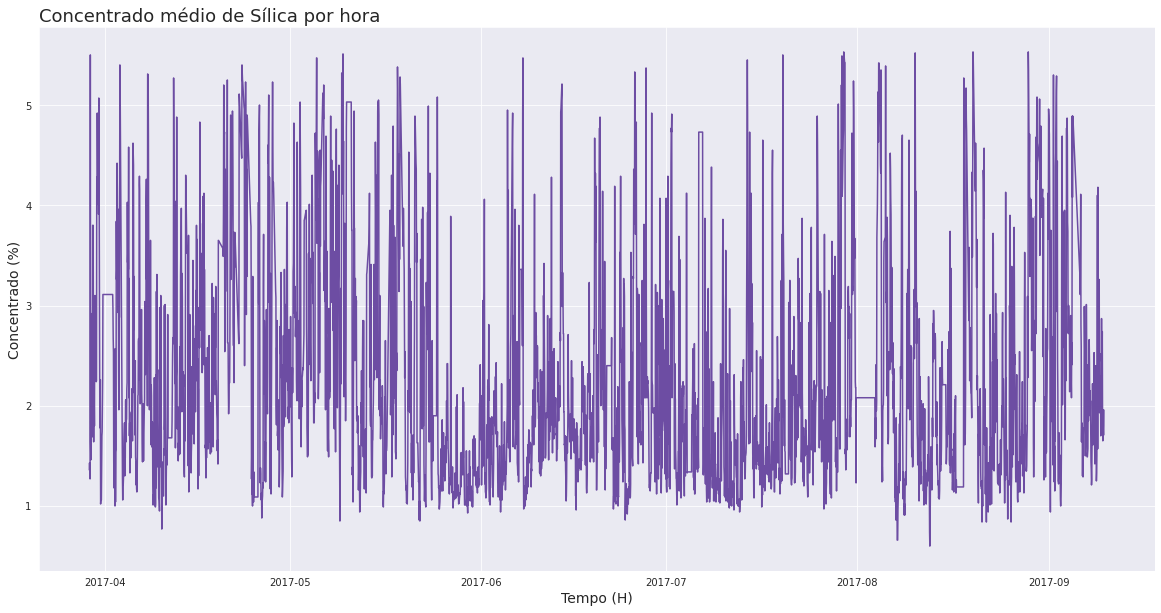

In [61]:
ax = sns.lineplot(x='date_hour', y='% Silica Concentrate', data=dados_hora, color=color_silica)
ax.figure.set_size_inches(20, 10)
ax.set_title('Concentrado médio de Sílica por hora', loc='left', fontsize=18)
ax.set_xlabel('Tempo (H)', fontsize=14)
ax.set_ylabel('Concentrado (%)', fontsize=14)

ax.plot()

Como a frequência horária indica ser a mais interessante de análises, irei decompor a série temporal para analisar se há alguma tendência ou sazonalidade nos dados.

In [62]:
from statsmodels.tsa.seasonal import seasonal_decompose

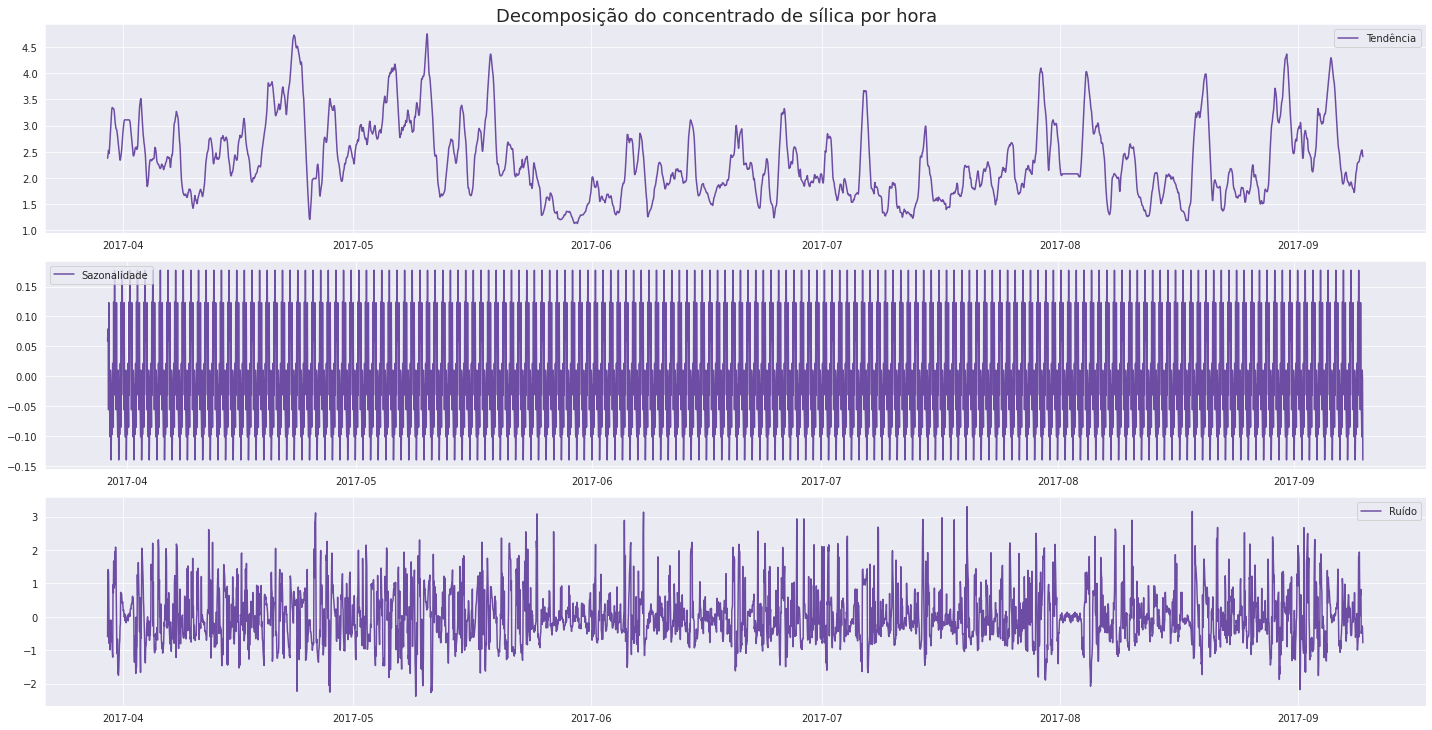

In [63]:
# Decompondo a série e plotando o resultado
result = seasonal_decompose(dados_hora['% Silica Concentrate'])

plt.figure(figsize=(20,10))
plt.suptitle('Decomposição do concentrado de sílica por hora', size=18, y=1.01)
plt.subplot(311)
plt.plot(result.trend, label='Tendência', color=color_silica)
plt.legend(loc='best')
plt.subplot(312)
plt.plot(result.seasonal,label='Sazonalidade', color=color_silica)
plt.legend(loc='best')
plt.subplot(313)
plt.plot(result.resid, label='Ruído', color=color_silica)
plt.legend(loc='best')
plt.tight_layout()

Os dados são bem ruidosos e não possuem uma tendência muita clara. Talvez haja uma tendência anual que não pode ser vista com os dados atuais.

No entanto, os dados indicam uma sazonalidade diária no processo.

[]

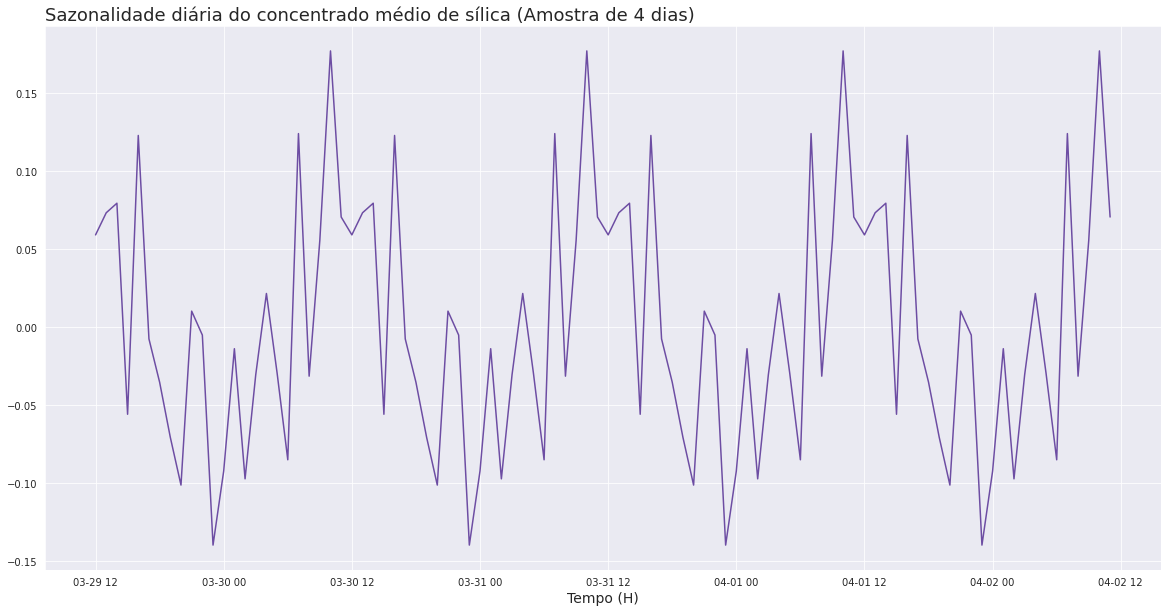

In [64]:
# plotando a sazonalidade para um período de 4 dias
ax = sns.lineplot(data=result.seasonal[:96], color=color_silica)
ax.figure.set_size_inches(20, 10)
ax.set_title('Sazonalidade diária do concentrado médio de sílica (Amostra de 4 dias)', loc='left', fontsize=18)
ax.set_xlabel('Tempo (H)', fontsize=14)
ax.set_ylabel('')

ax.plot()

Com o gráfico acima pode ser visualizado uma variação sazonal com **tendência positiva** no período de 00:00h até 12:00h do dia e uma **tendência negativa** no período de 12:00 até 23:00h, aproximadamente. 

**Isso pode revelar alguma característica importante da planta e do processo, mesmo com os dados ruidosos.**

Agrupar os dados pode nos revalear mais informações do processo, conform análises a seguir.

In [65]:
# Criando novas features para agrupamento
dados_hora['hour'] = pd.Series(dados_hora.index).dt.hour.values
dados_hora['day'] = pd.Series(dados_hora.index).dt.day.values
dados_hora['month'] = pd.Series(dados_hora.index).dt.month.values
dados_hora['dayofweek'] = pd.Series(dados_hora.index).dt.dayofweek.values
dados_hora.head()

% Iron Feed  % Silica Feed  Starch Flow  Amina Flow  \
date_hour                                                                  
2017-03-29 12:00:00        60.18           9.34  1060.859297  379.836203   
2017-03-29 13:00:00        60.18           9.34  2034.926525  322.233975   
2017-03-29 14:00:00        60.18           9.34  1435.425811  474.656322   
2017-03-29 15:00:00        60.18           9.34   618.460387  396.377733   
2017-03-29 16:00:00        59.54           9.56  1367.502858  317.134072   

                     Ore Pulp Flow  Ore Pulp pH  Ore Pulp Density  \
date_hour                                                           
2017-03-29 12:00:00     400.982539     9.527187          1.550374   
2017-03-29 13:00:00     400.468947     9.700679          1.532017   
2017-03-29 14:00:00     399.157083     9.687788          1.645200   
2017-03-29 15:00:00     398.942522     9.851689          1.559929   
2017-03-29 16:00:00     400.836283     9.936163          1.530984   

                     Flotation Column 01 Air Flow  \
date_hour                                           
2017-03-29 12:00:00                    200.035839   
2017-03-29 13:00:00                    199.990122   
2017-03-29 14:00:00                    200.019311   
2017-03-29 15:00:00                    199.940833   
2017-03-29 16:00:00                    199.878922   

                     Flotation Column 02 Air Flow  \
date_hour                                           
2017-03-29 12:00:00                    195.577700   
2017-03-29 13:00:00                    195.106250   
2017-03-29 14:00:00                    195.604928   
2017-03-29 15:00:00                    195.657094   
2017-03-29 16:00:00                    196.162864   

                     Flotation Column 03 Air Flow  ...  \
date_hour                                          ...   
2017-03-29 12:00:00                    199.983717  ...   
2017-03-29 13:00:00                    199.765344  ...   
2017-03-29 14:00:00                    199.925800  ...   
2017-03-29 15:00:00                    200.044339  ...   
2017-03-29 16:00:00                    199.905467  ...   

                     Flotation Column 03 Level  Flotation Column 04 Level  \
date_hour                                                                   
2017-03-29 12:00:00                 860.557818                 477.349197   
2017-03-29 13:00:00                 869.419421                 483.816131   
2017-03-29 14:00:00                 879.704989                 456.147231   
2017-03-29 15:00:00                 882.093896                 449.410744   
2017-03-29 16:00:00                 884.840698                 450.123050   

                     Flotation Column 05 Level  Flotation Column 06 Level  \
date_hour                                                                   
2017-03-29 12:00:00                 452.512522                 478.219647   
2017-03-29 13:00:00                 469.448172                 471.607075   
2017-03-29 14:00:00                 453.227000                 447.708467   
2017-03-29 15:00:00                 448.581506                 450.697578   
2017-03-29 16:00:00                 451.774694                 451.574422   

                     Flotation Column 07 Level  % Silica Concentrate  hour  \
date_hour                                                                    
2017-03-29 12:00:00                 470.105547                  1.36    12   
2017-03-29 13:00:00                 462.665478                  1.43    13   
2017-03-29 14:00:00                 453.475667                  1.33    14   
2017-03-29 15:00:00                 448.660094                  1.27    15   
2017-03-29 16:00:00                 449.406894                  5.50    16   

                     day  month  dayofweek  
date_hour                                   
2017-03-29 12:00:00   29      3          2  
2017-03-29 13:00:00   29      3          2  
2017-03-29 14:00:00   29      3          2  
2

[]

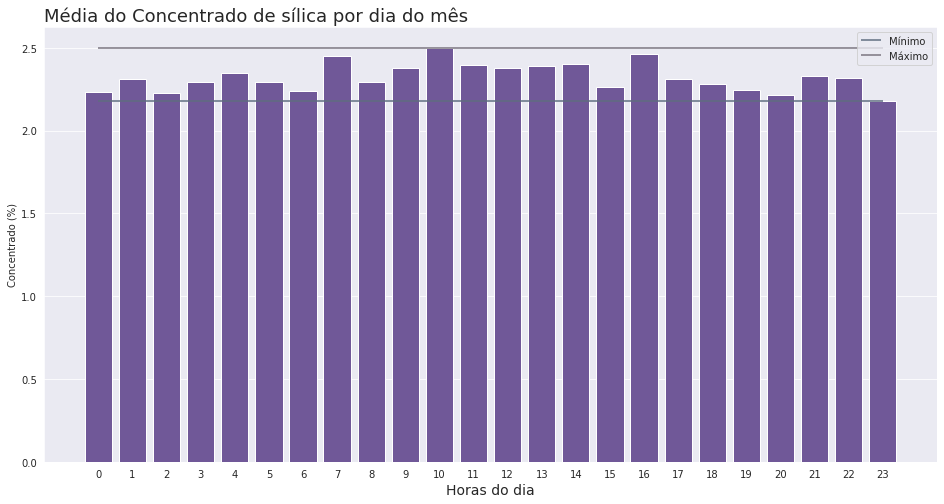

In [66]:
# Agrupando por hora
grupo_por_hora = dados_hora.groupby('hour').mean()
grupo_por_hora

# plotando os grupos horas do dia
ax = sns.barplot(data=grupo_por_hora, x=grupo_por_hora.index, y='% Silica Concentrate', color=color_silica)
plt.hlines(y=grupo_por_hora['% Silica Concentrate'].min(), xmin=grupo_por_hora.index.min(), xmax=grupo_por_hora.index.max(), label='Mínimo', color='#5f6d80')
plt.hlines(y=grupo_por_hora['% Silica Concentrate'].max(), xmin=grupo_por_hora.index.min(), xmax=grupo_por_hora.index.max(), label='Máximo', color='#7a747f')
ax.figure.set_size_inches(16, 8)
ax.set_title('Média do Concentrado de sílica por dia do mês', loc='left', fontsize=18)
ax.set_xlabel('Horas do dia', fontsize=14)
ax.set_ylabel('Concentrado (%)')
plt.legend(loc='best')
ax.plot()

O Gráfico acima confirma a sazonalidade.

**E o dia? Qual o dia do mês com maior concentrado de sílica?**

**Qual o dia da semana com maior concentrado de sílica?**

Todas essas perguntas podem ser respondidas com os agrupamentos.

[]

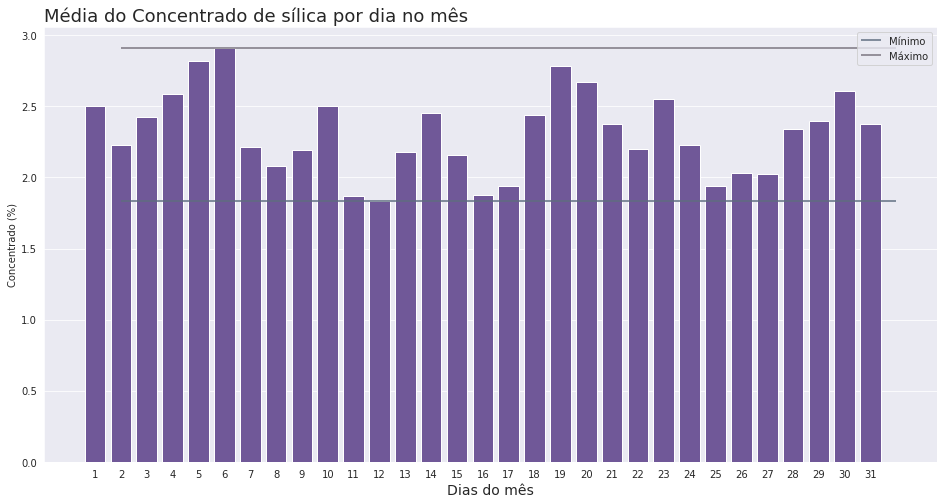

In [67]:
# Analisando os grupos por dia do mês
grupo_por_dia = dados_hora.groupby('day').mean()
grupo_por_dia

# plotando os grupos hora
ax = sns.barplot(data=grupo_por_dia, x=grupo_por_dia.index, y='% Silica Concentrate', color=color_silica)
plt.hlines(y=grupo_por_dia['% Silica Concentrate'].min(), xmin=grupo_por_dia.index.min(), xmax=grupo_por_dia.index.max(), label='Mínimo', color='#5f6d80')
plt.hlines(y=grupo_por_dia['% Silica Concentrate'].max(), xmin=grupo_por_dia.index.min(), xmax=grupo_por_dia.index.max(), label='Máximo', color='#7a747f')
ax.figure.set_size_inches(16, 8)
ax.set_title('Média do Concentrado de sílica por dia no mês', loc='left', fontsize=18)
ax.set_xlabel('Dias do mês', fontsize=14)
ax.set_ylabel('Concentrado (%)')
plt.legend(loc='best')
ax.plot()

[]

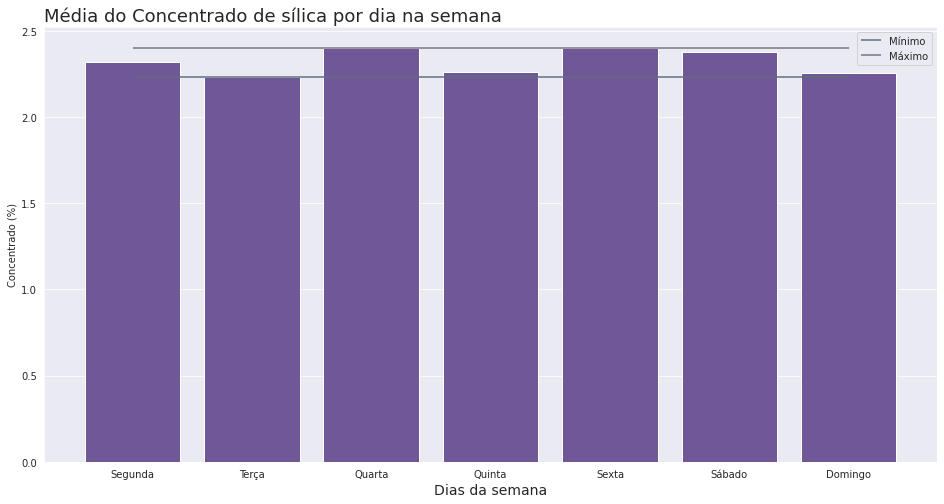

In [68]:
# Analisando os grupos por dia da semana
grupo_por_dayofweek = dados_hora.groupby('dayofweek').mean()
grupo_por_dayofweek

# plotando os grupos hora
ax = sns.barplot(data=grupo_por_dayofweek, x=grupo_por_dayofweek.index, y='% Silica Concentrate', color=color_silica)
plt.hlines(y=grupo_por_dayofweek['% Silica Concentrate'].min(), xmin=grupo_por_dayofweek.index.min(), xmax=grupo_por_dayofweek.index.max(), label='Mínimo', color='#5f6d80')
plt.hlines(y=grupo_por_dayofweek['% Silica Concentrate'].max(), xmin=grupo_por_dayofweek.index.min(), xmax=grupo_por_dayofweek.index.max(), label='Máximo', color='#7a747f')
ax.figure.set_size_inches(16, 8)
ax.set_title('Média do Concentrado de sílica por dia na semana', loc='left', fontsize=18)
ax.set_xlabel('Dias da semana', fontsize=14)
ax.set_ylabel('Concentrado (%)')
plt.legend(loc='best')
plt.xticks(ticks=grupo_por_dayofweek.index, labels=['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo'])
ax.plot()

[]

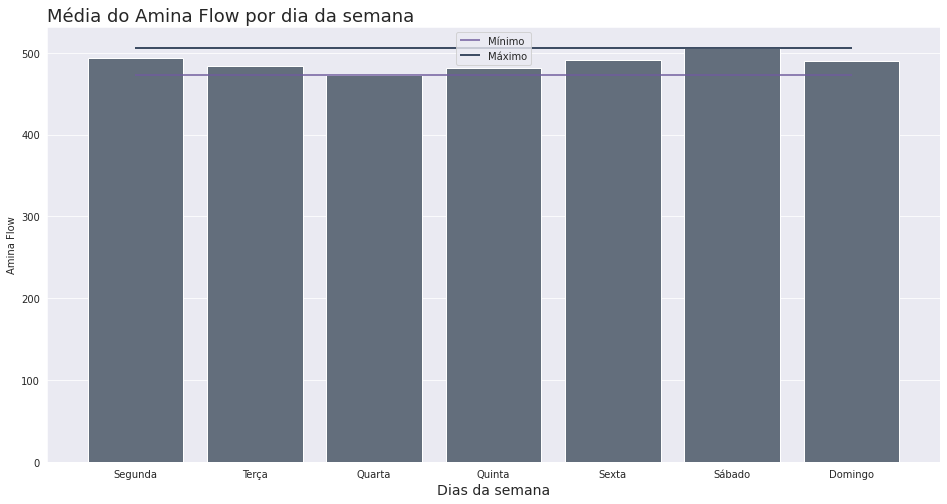

In [69]:
# Podemos também olhar para os dados do processo

# Analisando os grupos por dia da semana
grupo_por_dayofweek = dados_hora.groupby('dayofweek').mean()
grupo_por_dayofweek

# plotando os grupos hora
ax = sns.barplot(data=grupo_por_dayofweek, x=grupo_por_dayofweek.index, y='Amina Flow', color=color_iron)
plt.hlines(y=grupo_por_dayofweek['Amina Flow'].min(), xmin=grupo_por_dayofweek.index.min(), xmax=grupo_por_dayofweek.index.max(), label='Mínimo', color='#705c9e')
plt.hlines(y=grupo_por_dayofweek['Amina Flow'].max(), xmin=grupo_por_dayofweek.index.min(), xmax=grupo_por_dayofweek.index.max(), label='Máximo', color='#061935')
ax.figure.set_size_inches(16, 8)
ax.set_title('Média do Amina Flow por dia da semana', loc='left', fontsize=18)
ax.set_xlabel('Dias da semana', fontsize=14)
ax.set_ylabel('Amina Flow')
plt.legend(loc='best')
plt.xticks(ticks=grupo_por_dayofweek.index, labels=['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo'])
ax.plot()

In [70]:
# Vou excluir as features criadas para continuar usando o mesmo dataframe
dados_hora.drop(columns=['hour', 'day', 'month', 'dayofweek'], inplace=True)
dados_hora.head()

% Iron Feed  % Silica Feed  Starch Flow  Amina Flow  \
date_hour                                                                  
2017-03-29 12:00:00        60.18           9.34  1060.859297  379.836203   
2017-03-29 13:00:00        60.18           9.34  2034.926525  322.233975   
2017-03-29 14:00:00        60.18           9.34  1435.425811  474.656322   
2017-03-29 15:00:00        60.18           9.34   618.460387  396.377733   
2017-03-29 16:00:00        59.54           9.56  1367.502858  317.134072   

                     Ore Pulp Flow  Ore Pulp pH  Ore Pulp Density  \
date_hour                                                           
2017-03-29 12:00:00     400.982539     9.527187          1.550374   
2017-03-29 13:00:00     400.468947     9.700679          1.532017   
2017-03-29 14:00:00     399.157083     9.687788          1.645200   
2017-03-29 15:00:00     398.942522     9.851689          1.559929   
2017-03-29 16:00:00     400.836283     9.936163          1.530984   

                     Flotation Column 01 Air Flow  \
date_hour                                           
2017-03-29 12:00:00                    200.035839   
2017-03-29 13:00:00                    199.990122   
2017-03-29 14:00:00                    200.019311   
2017-03-29 15:00:00                    199.940833   
2017-03-29 16:00:00                    199.878922   

                     Flotation Column 02 Air Flow  \
date_hour                                           
2017-03-29 12:00:00                    195.577700   
2017-03-29 13:00:00                    195.106250   
2017-03-29 14:00:00                    195.604928   
2017-03-29 15:00:00                    195.657094   
2017-03-29 16:00:00                    196.162864   

                     Flotation Column 03 Air Flow  ...  \
date_hour                                          ...   
2017-03-29 12:00:00                    199.983717  ...   
2017-03-29 13:00:00                    199.765344  ...   
2017-03-29 14:00:00                    199.925800  ...   
2017-03-29 15:00:00                    200.044339  ...   
2017-03-29 16:00:00                    199.905467  ...   

                     Flotation Column 06 Air Flow  \
date_hour                                           
2017-03-29 12:00:00                    250.069722   
2017-03-29 13:00:00                    250.029056   
2017-03-29 14:00:00                    249.979356   
2017-03-29 15:00:00                    249.978589   
2017-03-29 16:00:00                    250.061661   

                     Flotation Column 07 Air Flow  Flotation Column 01 Level  \
date_hour                                                                      
2017-03-29 12:00:00                    249.992956                 753.724247   
2017-03-29 13:00:00                    250.059711                 848.675503   
2017-03-29 14:00:00                    250.111328                 851.951492   
2017-03-29 15:00:00                    250.028506                 855.910630   
2017-03-29 16:00:00                    250.122067                 851.603513   

                     Flotation Column 02 Level  Flotation Column 03 Level  \
date_hour                                                                   
2017-03-29 12:00:00                 726.559437                 860.557818   
2017-03-29 13:00:00                 777.784437                 869.419421   
2017-03-29 14:00:00                 776.293654                 879.704989   
2017-03-29 15:00:00                 780.369869                 882.093896   
2017-03-29 16:00:00                 784.446084                 884.840698   

                     Flotation Column 04 Level  Flotation Column 05 Level  \
date_hour                                                                   
2017-03-29 12:00:00                 477.349197                 452.512522   
2017-03-29 13:00:00                 483.816131                 469.448172   
2017-03-29 14:00:00                 456.147231                 453.22700

### **Terceira Etapa da análise:** Modelo de predição
---

#### **Predição temporal do concentrado de sílica com LSTM e dados do processo**

Nesta modelagem irei prever o concentrado médio da hora atual com base nos dados do processo da hora anterior. Para isso é preciso remodelar o dataset deslocando os dados de forma adequada.

In [71]:
# Construindo um novo dataframe para trabalho
dataset = dados_hora.copy()

dataset['% Silica Concentrate (t)'] = dataset['% Silica Concentrate'].shift(-1)
dataset

% Iron Feed  % Silica Feed  Starch Flow  Amina Flow  \
date_hour                                                                  
2017-03-29 12:00:00        60.18           9.34  1060.859297  379.836203   
2017-03-29 13:00:00        60.18           9.34  2034.926525  322.233975   
2017-03-29 14:00:00        60.18           9.34  1435.425811  474.656322   
2017-03-29 15:00:00        60.18           9.34   618.460387  396.377733   
2017-03-29 16:00:00        59.54           9.56  1367.502858  317.134072   
...                          ...            ...          ...         ...   
2017-09-09 19:00:00        49.75          23.20  3327.047776  497.211189   
2017-09-09 20:00:00        49.75          23.20  4225.800333  508.963856   
2017-09-09 21:00:00        49.75          23.20  2808.214692  517.748822   
2017-09-09 22:00:00        49.75          23.20  3191.497672  492.511228   
2017-09-09 23:00:00        49.75          23.20  3638.543653  460.769950   

                     Ore Pulp Flow  Ore Pulp pH  Ore Pulp Density  \
date_hour                                                           
2017-03-29 12:00:00     400.982539     9.527187          1.550374   
2017-03-29 13:00:00     400.468947     9.700679          1.532017   
2017-03-29 14:00:00     399.157083     9.687788          1.645200   
2017-03-29 15:00:00     398.942522     9.851689          1.559929   
2017-03-29 16:00:00     400.836283     9.936163          1.530984   
...                            ...          ...               ...   
2017-09-09 19:00:00     380.847200     9.176166          1.660871   
2017-09-09 20:00:00     381.112889     9.387541          1.691996   
2017-09-09 21:00:00     381.064411     9.771277          1.735647   
2017-09-09 22:00:00     380.445006     9.782121          1.716644   
2017-09-09 23:00:00     380.823147     9.653802          1.667826   

                     Flotation Column 01 Air Flow  \
date_hour                                           
2017-03-29 12:00:00                    200.035839   
2017-03-29 13:00:00                    199.990122   
2017-03-29 14:00:00                    200.019311   
2017-03-29 15:00:00                    199.940833   
2017-03-29 16:00:00                    199.878922   
...                                           ...   
2017-09-09 19:00:00                    301.565561   
2017-09-09 20:00:00                    300.050172   
2017-09-09 21:00:00                    299.814289   
2017-09-09 22:00:00                    300.122756   
2017-09-09 23:00:00                    299.778889   

                     Flotation Column 02 Air Flow  \
date_hour                                           
2017-03-29 12:00:00                    195.577700   
2017-03-29 13:00:00                    195.106250   
2017-03-29 14:00:00                    195.604928   
2017-03-29 15:00:00                    195.657094   
2017-03-29 16:00:00                    196.162864   
...                                           ...   
2017-09-09 19:00:00                    300.169133   
2017-09-09 20:00:00                    299.967839   
2017-09-09 21:00:00                    299.801561   
2017-09-09 22:00:00                    299.679472   
2017-09-09 23:00:00                    300.095394   

                     Flotation Column 03 Air Flow  ...  \
date_hour                                          ...   
2017-03-29 12:00:00                    199.983717  ...   
2017-03-29 13:00:00                    199.765344  ...   
2017-03-29 14:00:00                    199.925800  ...   
2017-03-29 15:00:00                    200.044339  ...   
2017-03-29 16:00:00                    199.905467  ...   
...                                           ...  ...   
2017-09-09 19:00:00                    299.900722  ...   
2017-09-09 20:00:00                    299.906550  ...   
2017-09-09 21:00:00                    299.973161  ...   
2017-09-09 22:00:00                    299.927028  ...   
2017-09-09 23:00:00                    299.840833  ...   


Agora temos um dataset onde os dados de entrada estão no tempo (t-1), e a coluna **% Silica Concentrate (t**) estão no tempo (t).

In [72]:
# Excluindo a última linha, com o valor Nan
dataset.dropna(inplace=True)
dataset.tail()

% Iron Feed  % Silica Feed  Starch Flow  Amina Flow  \
date_hour                                                                  
2017-09-09 18:00:00        49.75           23.2  2582.123305  489.346178   
2017-09-09 19:00:00        49.75           23.2  3327.047776  497.211189   
2017-09-09 20:00:00        49.75           23.2  4225.800333  508.963856   
2017-09-09 21:00:00        49.75           23.2  2808.214692  517.748822   
2017-09-09 22:00:00        49.75           23.2  3191.497672  492.511228   

                     Ore Pulp Flow  Ore Pulp pH  Ore Pulp Density  \
date_hour                                                           
2017-09-09 18:00:00     380.557833     9.433931          1.666070   
2017-09-09 19:00:00     380.847200     9.176166          1.660871   
2017-09-09 20:00:00     381.112889     9.387541          1.691996   
2017-09-09 21:00:00     381.064411     9.771277          1.735647   
2017-09-09 22:00:00     380.445006     9.782121          1.716644   

                     Flotation Column 01 Air Flow  \
date_hour                                           
2017-09-09 18:00:00                    297.858500   
2017-09-09 19:00:00                    301.565561   
2017-09-09 20:00:00                    300.050172   
2017-09-09 21:00:00                    299.814289   
2017-09-09 22:00:00                    300.122756   

                     Flotation Column 02 Air Flow  \
date_hour                                           
2017-09-09 18:00:00                    299.415439   
2017-09-09 19:00:00                    300.169133   
2017-09-09 20:00:00                    299.967839   
2017-09-09 21:00:00                    299.801561   
2017-09-09 22:00:00                    299.679472   

                     Flotation Column 03 Air Flow  ...  \
date_hour                                          ...   
2017-09-09 18:00:00                    299.824800  ...   
2017-09-09 19:00:00                    299.900722  ...   
2017-09-09 20:00:00                    299.906550  ...   
2017-09-09 21:00:00                    299.973161  ...   
2017-09-09 22:00:00                    299.927028  ...   

                     Flotation Column 07 Air Flow  Flotation Column 01 Level  \
date_hour                                                                      
2017-09-09 18:00:00                    299.941533                 420.148672   
2017-09-09 19:00:00                    298.736661                 397.781583   
2017-09-09 20:00:00                    303.599269                 399.928567   
2017-09-09 21:00:00                    309.875439                 399.961433   
2017-09-09 22:00:00                    305.254558                 399.601383   

                     Flotation Column 02 Level  Flotation Column 03 Level  \
date_hour                                                                   
2017-09-09 18:00:00                 499.937739                 415.447022   
2017-09-09 19:00:00                 498.753311                 403.858956   
2017-09-09 20:00:00                 499.648950                 399.208611   
2017-09-09 21:00:00                 500.484917                 471.827489   
2017-09-09 22:00:00                 498.614494                 836.277192   

                     Flotation Column 04 Level  Flotation Column 05 Level  \
date_hour                                                                   
2017-09-09 18:00:00                 405.179539                 499.766694   
2017-09-09 19:00:00                 398.930467                 502.971728   
2017-09-09 20:00:00                 399.967122                 501.624533   
2017-09-09 21:00:00                 399.931033                 500.223311   
2017-09-09 22:00:00                 400.455389                 500.406239   

                     Flotation Column 06 Level  Flotation Column 07 Level  \
date_hour                                                                   
2017-09-09 18:00:00                 406.676483            

Alguns treinamentos foram realizados considerando a seleção de features e todo o conjunto de features original. 

Os resultados foram bem parecidos e não apresentaram muitas diferenças no resultado final da predição.

A seguir, um processo de treino realizado com a seleção de features.

In [73]:
# Separando os dados de entrada com a seleção de features

X = dataset.iloc[:, :-2]
X = X[best_features_selected]

In [74]:
# Separando os dados de saída

y = dataset.iloc[:, -1]
y = y.values.reshape(-1, 1)

In [75]:
print(f'Shape de X: {X.shape}')
print(f'Shape de y: {y.shape}')

Shape de X: (3947, 15)
Shape de y: (3947, 1)


In [76]:
# Normalizando os dados
from sklearn.preprocessing import MinMaxScaler

In [77]:
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaled_X = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler(feature_range=(0, 1))
scaled_y = scaler_y.fit_transform(y)

In [78]:
# Confirmando os formatos
print(f'Shape de X: {scaled_X.shape}')
print(f'Shape de y: {scaled_y.shape}')

Shape de X: (3947, 15)
Shape de y: (3947, 1)


In [79]:
# Definindo o tamanho dos splits
n_train = int(np.round(len(X)*.70))
n_valid = int(np.round(len(X)*.15))
n_test = int(np.round(len(X)*.15))

print(n_train, n_valid, n_test)

2763 592 592


In [80]:
# Separando os dados em treino, validação e teste
X_train = scaled_X[:n_train, :]
y_train = scaled_y[:n_train]

X_val = scaled_X[n_train:(n_train+n_valid), :]
y_val = scaled_y[n_train:(n_train+n_valid), :]

X_test = scaled_X[(n_train+n_valid):, :]
y_test = scaled_y[(n_train+n_valid):, :]

In [81]:
# Confirmando os formatos novamente
print(f'Shape de X_train: {X_train.shape}')
print(f'Shape de y_train: {y_train.shape}')

print(f'Shape de X_val: {X_val.shape}')
print(f'Shape de y_val: {y_val.shape}')

print(f'Shape de X_test: {X_test.shape}')
print(f'Shape de y_test: {y_test.shape}')

Shape de X_train: (2763, 15)
Shape de y_train: (2763, 1)
Shape de X_val: (592, 15)
Shape de y_val: (592, 1)
Shape de X_test: (592, 15)
Shape de y_test: (592, 1)


In [82]:
# Reshape das entradas para o modelo de LSTM (amostras, timesteps, features)
# Aqui as 8 features das amostras serão passadas em um único passo para a rede

timesteps = 1

X_train = X_train.reshape((X_train.shape[0], timesteps, X_train.shape[1]))
X_val = X_val.reshape((X_val.shape[0], timesteps, X_val.shape[1]))
X_test = X_test.reshape((X_test.shape[0], timesteps, X_test.shape[1]))

In [83]:
# Olhando um registro para ver o formato
X_train[0], y_train[0]

(array([[0.75694444, 0.25023372, 0.16189423, 0.27711237, 0.37673081,
         0.10208468, 0.17704192, 0.13203764, 0.1814062 , 0.33797338,
         0.33169233, 0.61113931, 0.51765712, 0.55480014, 0.60590942]]),
 array([0.168357]))

In [84]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [85]:
# Construindo a rede LSTM

regressor = Sequential()

regressor.add(LSTM(units = 64, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
#regressor.add(Dropout(0.15)) # apaga 15% das células para evitar overfitting 

regressor.add(LSTM(units = 64))
#regressor.add(Dropout(0.15))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mae', metrics=[[tensorflow.keras.metrics.RootMeanSquaredError()]])


from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
#es = EarlyStopping(monitor = 'loss', min_delta = 1e-10, patience = 10, verbose = 1)
#rlr = ReduceLROnPlateau(monitor = 'loss', factor = 0.01, patience = 10, verbose = 1)

mcp = ModelCheckpoint(filepath = 'pesosLSTM1.hdf5', monitor = 'loss', save_best_only = True, verbose = 1)

In [86]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 64)             20480     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 53,569
Trainable params: 53,569
Non-trainable params: 0
_________________________________________________________________


In [87]:
# Etapa de treino e validação
history = regressor.fit(X_train, y_train, epochs = 120, batch_size = 16,
                        callbacks = [mcp],
                        validation_data=(X_val, y_val),
                        shuffle=False)

Epoch 1/120
168/173 [============================>.] - ETA: 0s - loss: 0.1893 - root_mean_squared_error: 0.2544
Epoch 1: loss improved from inf to 0.18841, saving model to pesosLSTM1.hdf5
173/173 [==============================] - 5s 9ms/step - loss: 0.1884 - root_mean_squared_error: 0.2537 - val_loss: 0.1947 - val_root_mean_squared_error: 0.2779
Epoch 2/120
168/173 [============================>.] - ETA: 0s - loss: 0.1771 - root_mean_squared_error: 0.2318
Epoch 2: loss improved from 0.18841 to 0.17640, saving model to pesosLSTM1.hdf5
173/173 [==============================] - 1s 4ms/step - loss: 0.1764 - root_mean_squared_error: 0.2315 - val_loss: 0.1933 - val_root_mean_squared_error: 0.2767
Epoch 3/120
164/173 [===========================>..] - ETA: 0s - loss: 0.1788 - root_mean_squared_error: 0.2328
Epoch 3: loss improved from 0.17640 to 0.17556, saving model to pesosLSTM1.hdf5
173/173 [==============================] - 1s 4ms/step - loss: 0.1756 - root_mean_squared_error: 0.2303 - 

In [88]:
# Histórico dos dados
train_loss = history.history['loss']
valid_loss = history.history['val_loss']

rmse_train_loss = history.history['root_mean_squared_error']
rmse_valid_loss = history.history['val_root_mean_squared_error']

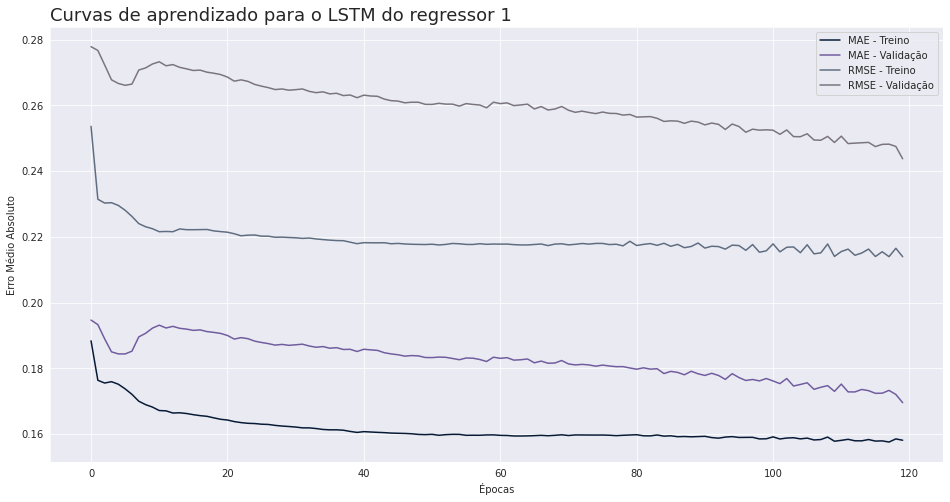

In [89]:
# Plot do aprendizado

fig, ax = plt.subplots(figsize=(16,8))

ax.plot(train_loss, label='MAE - Treino', color='#061935')
ax.plot(valid_loss, label='MAE - Validação', color='#705c9e')

ax.plot(rmse_train_loss, label='RMSE - Treino', color='#5f6d80')
ax.plot(rmse_valid_loss, label='RMSE - Validação', color='#7a747f')

ax.set_title('Curvas de aprendizado para o LSTM do regressor 1', loc='left', size=18)
ax.set_xlabel('Épocas')
ax.set_ylabel('Erro Médio Absoluto')

ax.legend(loc='best')

plt.show()

Predições

In [90]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [91]:
y_test_original = y[(n_train+n_valid):]

In [92]:
# Realizando as predições e transformando o resultado para a escala original
y_pred_scaled = regressor.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

In [93]:
# Calculando os erros da predição
mae = mean_absolute_error(y_test_original, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))

print(f'Avaliação das predições:')
print(f'MAE : {mae:.4f}')
print(f'RMSE: {rmse:.4f}')

Avaliação das predições:
MAE : 0.9209
RMSE: 1.3040


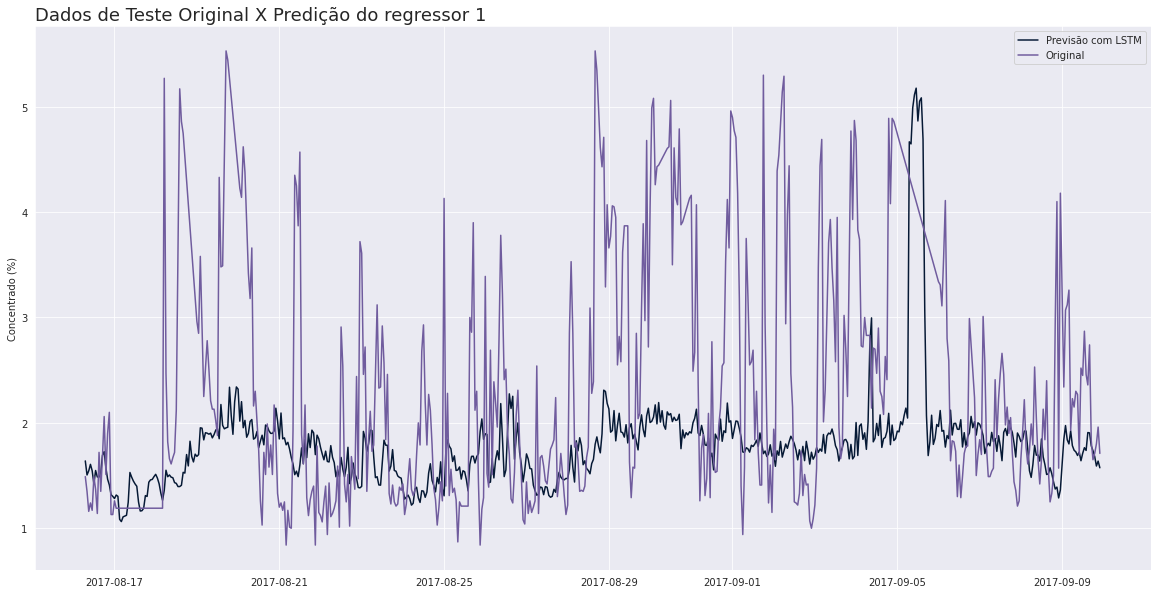

In [94]:
plt.figure(figsize=(20,10)) 

plt.plot(dataset.index[-n_test:], y_pred, color = '#061935', label='Previsão com LSTM')
plt.plot(dataset.index[-n_test:], y_test_original, color = '#705c9e', label='Original')
plt.title('Dados de Teste Original X Predição do regressor 1', loc='left', size=18)
plt.ylabel('Concentrado (%)')
plt.legend()
plt.show()

**Análises do resultado do regressor 1 e considerações para novos testes**:

- Analisando os erros pode ser verificado que não há uma discrepância muito grande entre as métricas de erro, indicando uma variância não muito alta nos dados. Se houvesse muitos outliers nos dados a tendência é que o RMSE fosse muito maior do que o MAE;

- pelo gráfico, parece que ainda há uma tendência de redução dos erros; 

- É interessante observar que o modelo identifica um pouco da tendência dos dados, mas não é capaz de capturar toda a variação original. Treinar com os dados transformados com o PCA aqui pode ser uma boa estratégia.

- Pode ser testados modelos de predição **não temporal**, para caracterizar a regressão do concentrado de sílica atual com base nas entradas atuais. 
  - Um modelo desse também pode ser útil nas definições de estratégias do processo;

#### **Predição temporal apenas do concentrado de sílica com LSTM**

Aqui irei considerar os dados de sílica das 3h anteriores ao horário atual para predição, baseado na autorrelação identificada.

In [ ]:
# Construindo um novo dataframe para armazenar os dados horários deslocados
df2 = pd.DataFrame()

df2['t-3'] = dados_hora['% Silica Concentrate'].shift(+3)
df2['t-2'] = dados_hora['% Silica Concentrate'].shift(+2)
df2['t-1'] = dados_hora['% Silica Concentrate'].shift(+1)
df2['t0'] = dados_hora['% Silica Concentrate']

# Excluindo linhas com valores nulos
df2.dropna(inplace=True)

df2

t-3   t-2   t-1    t0
date_hour                                  
2017-03-29 15:00:00  1.36  1.43  1.33  1.27
2017-03-29 16:00:00  1.43  1.33  1.27  5.50
2017-03-29 17:00:00  1.33  1.27  5.50  1.64
2017-03-29 18:00:00  1.27  5.50  1.64  1.46
2017-03-29 19:00:00  5.50  1.64  1.46  1.69
...                   ...   ...   ...   ...
2017-09-09 19:00:00  2.36  2.74  1.83  1.65
2017-09-09 20:00:00  2.74  1.83  1.65  1.71
2017-09-09 21:00:00  1.83  1.65  1.71  1.80
2017-09-09 22:00:00  1.65  1.71  1.80  1.96
2017-09-09 23:00:00  1.71  1.80  1.96  1.71

[3945 rows x 4 columns]

Abaixo repito o mesmo processo anterior de separar X e y (que agora irão ser chamados de X2 e y2), escalar e dividir os dados, treinar e realizar as predições para comparação.

In [ ]:
# Novos X e y
X2 = df2.iloc[:, :-1]
y2 = df2.iloc[:, -1].values.reshape(-1,1)

In [ ]:
# Novas escalas 
scaler_X2 = MinMaxScaler(feature_range=(0, 1))
scaled_X2 = scaler_X2.fit_transform(X2)

scaler_y2 = MinMaxScaler(feature_range=(0, 1))
scaled_y2 = scaler_y2.fit_transform(y2)

In [ ]:
# Definindo o tamanho dos splits
n_train = int(np.round(len(X2)*.70))
n_valid = int(np.round(len(X2)*.15))
n_test = int(np.round(len(X2)*.15))

print(n_train, n_valid, n_test)

2762 592 592


In [ ]:
# Separando os dados
X_train2 = scaled_X2[:n_train, :]
y_train2 = scaled_y2[:n_train]

X_val2 = scaled_X2[n_train:(n_train+n_valid), :]
y_val2 = scaled_y2[n_train:(n_train+n_valid), :]

X_test2 = scaled_X2[(n_train+n_valid):, :]
y_test2 = scaled_y2[(n_train+n_valid):, :]

In [ ]:
# Confirmando os formatos
print(f'Shape de X_train: {X_train2.shape}')
print(f'Shape de y_train: {y_train2.shape}')

print(f'Shape de X_val: {X_val2.shape}')
print(f'Shape de y_val: {y_val2.shape}')

print(f'Shape de X_test: {X_test2.shape}')
print(f'Shape de y_test: {y_test2.shape}')

Shape de X_train: (2762, 3)
Shape de y_train: (2762, 1)
Shape de X_val: (592, 3)
Shape de y_val: (592, 1)
Shape de X_test: (591, 3)
Shape de y_test: (591, 1)


Reshape das entradas para o modelo de LSTM (amostras, timesteps, features)

Aqui as 3 features das amostras anteriores serão passadas individualmente em três tempos distintos, pois o concentrado de cada hora depende da amostra anterior.

In [ ]:
timesteps = 3

X_train2 = X_train2.reshape((X_train2.shape[0], timesteps, 1))
X_val2 = X_val2.reshape((X_val2.shape[0], timesteps, 1))
X_test2 = X_test2.reshape((X_test2.shape[0], timesteps, 1))

In [ ]:
X_train2[0], y_train2[0]

(array([[0.15415822],
        [0.168357  ],
        [0.14807302]]), array([0.13590264]))

In [ ]:
X_train2.shape

(2762, 3, 1)

In [ ]:
# Construindo a rede LSTM

# regressor 2
regressor2 = Sequential()

regressor2.add(LSTM(units = 64, return_sequences = True, input_shape = (X_train2.shape[1], X_train2.shape[2])))
#regressor.add(Dropout(0.15)) # apaga 15% das células para evitar overfitting 

regressor2.add(LSTM(units = 64))
#regressor.add(Dropout(0.15))

regressor2.add(Dense(units = 1))

regressor2.compile(optimizer = 'adam', loss = 'mae', metrics=[[tensorflow.keras.metrics.RootMeanSquaredError()]])


from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
#es = EarlyStopping(monitor = 'loss', min_delta = 1e-10, patience = 10, verbose = 1)
#rlr = ReduceLROnPlateau(monitor = 'loss', factor = 0.01, patience = 10, verbose = 1)

mcp2 = ModelCheckpoint(filepath = 'pesosLSTM2.hdf5', monitor = 'loss', save_best_only = True, verbose = 1)

In [ ]:
regressor2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 3, 64)             16896     
                                                                 
 lstm_5 (LSTM)               (None, 64)                33024     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 49,985
Trainable params: 49,985
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Etapa de treino e validação do regressor 2
history2 = regressor2.fit(X_train2, y_train2, epochs = 120, batch_size = 16,
                        callbacks = [mcp2],
                        validation_data=(X_val2, y_val2),
                        shuffle=False)

Epoch 1/120
172/173 [============================>.] - ETA: 0s - loss: 0.1329 - root_mean_squared_error: 0.1889
Epoch 1: loss improved from inf to 0.13289, saving model to pesosLSTM2.hdf5
173/173 [==============================] - 6s 13ms/step - loss: 0.1329 - root_mean_squared_error: 0.1888 - val_loss: 0.1083 - val_root_mean_squared_error: 0.1588
Epoch 2/120
171/173 [============================>.] - ETA: 0s - loss: 0.1145 - root_mean_squared_error: 0.1629
Epoch 2: loss improved from 0.13289 to 0.11434, saving model to pesosLSTM2.hdf5
173/173 [==============================] - 2s 10ms/step - loss: 0.1143 - root_mean_squared_error: 0.1626 - val_loss: 0.1056 - val_root_mean_squared_error: 0.1549
Epoch 3/120
173/173 [==============================] - ETA: 0s - loss: 0.1107 - root_mean_squared_error: 0.1575
Epoch 3: loss improved from 0.11434 to 0.11069, saving model to pesosLSTM2.hdf5
173/173 [==============================] - 2s 10ms/step - loss: 0.1107 - root_mean_squared_error: 0.1575

In [ ]:
# Histórico dos novos dados
train_loss2 = history2.history['loss']
valid_loss2 = history2.history['val_loss']

rmse_train_loss2 = history2.history['root_mean_squared_error']
rmse_valid_loss2 = history2.history['val_root_mean_squared_error']

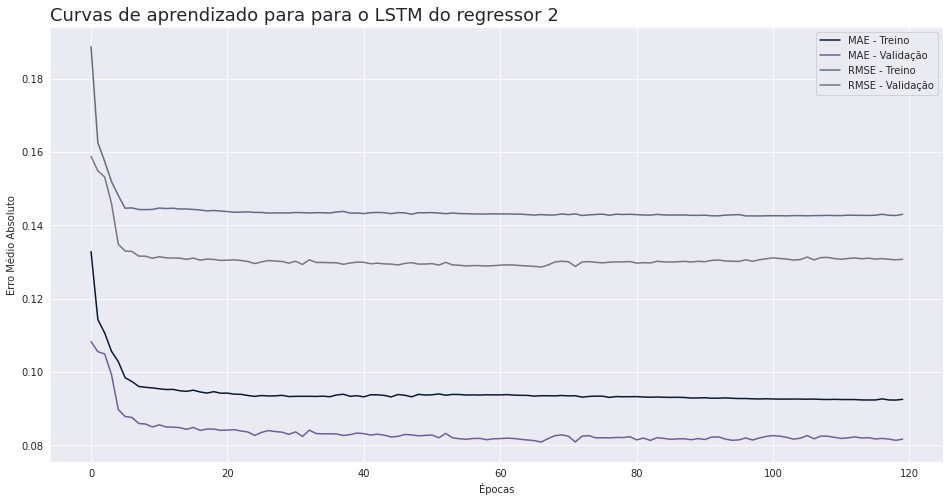

In [ ]:
# Plot do aprendizado

fig, ax = plt.subplots(figsize=(16,8))

ax.plot(train_loss2, label='MAE - Treino', color='#061935')
ax.plot(valid_loss2, label='MAE - Validação', color='#705c9e')

ax.plot(rmse_train_loss2, label='RMSE - Treino', color='#5f6d80')
ax.plot(rmse_valid_loss2, label='RMSE - Validação', color='#7a747f')

ax.set_title('Curvas de aprendizado para para o LSTM do regressor 2', loc='left', size=18)
ax.set_xlabel('Épocas')
ax.set_ylabel('Erro Médio Absoluto')

ax.legend(loc='best')

plt.show()

Predições

In [ ]:
y_test_original2 = y2[(n_train+n_valid):]

In [ ]:
# Realizando as predições e transformando o resultado para a escala original
y_pred_scaled2 = regressor2.predict(X_test2)
y_pred2 = scaler_y2.inverse_transform(y_pred_scaled2)

In [ ]:
# Calculando os erros da predição
mae2 = mean_absolute_error(y_test_original2, y_pred2)
rmse2 = np.sqrt(mean_squared_error(y_test_original2, y_pred2))

In [ ]:
print(f'Avaliação das predições:')
print(f'MAE : {mae2:.4f}')
print(f'RMSE: {rmse2:.4f}')

Avaliação das predições:
MAE : 0.4666
RMSE: 0.7322


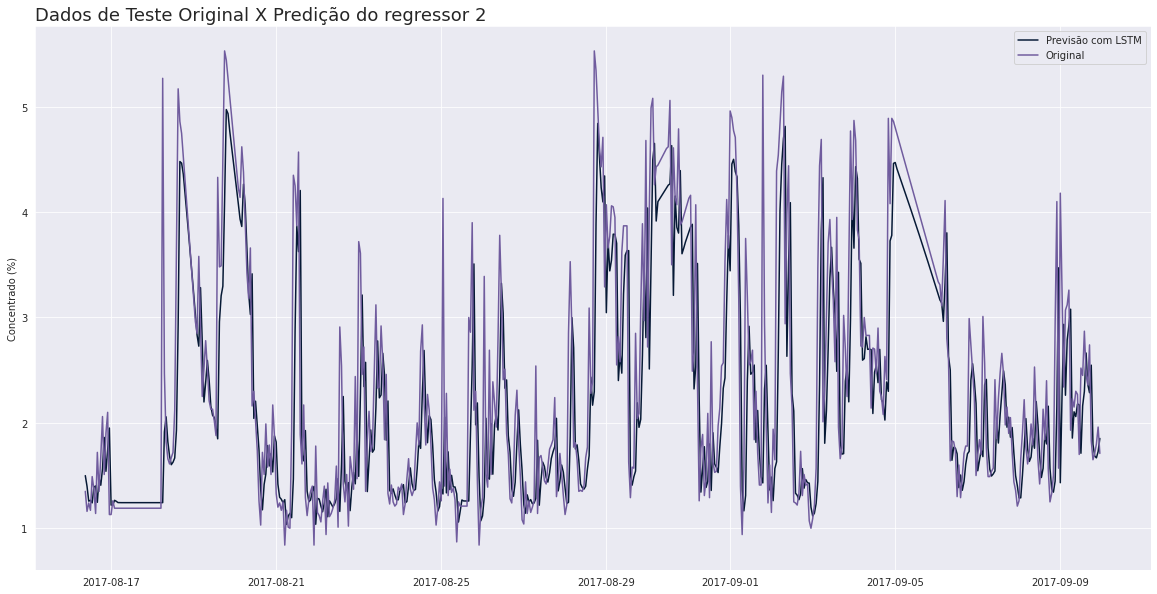

In [ ]:
plt.figure(figsize=(20,10)) 

plt.plot(df2.index[-n_test+1:], y_pred2, color = '#061935', label='Previsão com LSTM')
plt.plot(df2.index[-n_test+1:], y_test_original2, color = '#705c9e', label='Original')
plt.title('Dados de Teste Original X Predição do regressor 2', loc='left', size=18)
plt.ylabel('Concentrado (%)')
plt.legend()
plt.show()

**Análises do resultado do modelo de LSTM e considerações para novos testes**:

- A modelagem da série temporal do concentrado de sílica apresenta resultados bem mais precisos do que o modelo anterior testado; Pode ser previsto o valor de concentrado de sílica do tempo (t) com base nos três horários passados;

- Como foi observado que os dados de até três horas atrás da série temporal influencia no valor atual da série, pode ser configurado um dataset de entrada onde esses registros sejam concatenados com os dados do processo e passados como entradas, como um timestep horário. 
  - Esta estratégia levaria em consideração os dados anteriores do processo e os resultados de concentrado de sílica, em conjunto.



#### **Predição temporal apenas do concentrado de sílica com LSTM para o futuro**

Aqui irei considerar os dados de sílica da hora atual (t) e de duas horas anteriores (t-1 e t-2) para prever o concentrado das duas próximas horas (t+1 e t+2).

In [ ]:
# Construindo um novo dataframe para armazenar os dados horários deslocados
df3 = pd.DataFrame()

df3['t-2'] = dados_hora['% Silica Concentrate'].shift(+2)
df3['t-1'] = dados_hora['% Silica Concentrate'].shift(+1)
df3['t0'] = dados_hora['% Silica Concentrate']
df3['t+1'] = dados_hora['% Silica Concentrate'].shift(-1)
df3['t+2'] = dados_hora['% Silica Concentrate'].shift(-2)
df3.dropna(inplace=True)

df3

t-2   t-1    t0   t+1   t+2
date_hour                                        
2017-03-29 14:00:00  1.36  1.43  1.33  1.27  5.50
2017-03-29 15:00:00  1.43  1.33  1.27  5.50  1.64
2017-03-29 16:00:00  1.33  1.27  5.50  1.64  1.46
2017-03-29 17:00:00  1.27  5.50  1.64  1.46  1.69
2017-03-29 18:00:00  5.50  1.64  1.46  1.69  1.81
...                   ...   ...   ...   ...   ...
2017-09-09 17:00:00  2.46  2.36  2.74  1.83  1.65
2017-09-09 18:00:00  2.36  2.74  1.83  1.65  1.71
2017-09-09 19:00:00  2.74  1.83  1.65  1.71  1.80
2017-09-09 20:00:00  1.83  1.65  1.71  1.80  1.96
2017-09-09 21:00:00  1.65  1.71  1.80  1.96  1.71

[3944 rows x 5 columns]

Repetindo o mesmo processo anterior de separar X e y (que agora irão ser chamados de X3 e y3), escalar e dividir os dados, treinar e realizar as predições para comparação.

In [ ]:
# Novos X e y
X3 = df3.iloc[:, :-2]
y3 = df3.iloc[:, 3:].values.reshape(-1,2)

In [ ]:
print(X3.shape, y3.shape)

(3944, 3) (3944, 2)


In [ ]:
# Novas escalas 
scaler_X3 = MinMaxScaler(feature_range=(0, 1))
scaled_X3 = scaler_X3.fit_transform(X3)

scaler_y3 = MinMaxScaler(feature_range=(0, 1))
scaled_y3 = scaler_y3.fit_transform(y3)

In [ ]:
# Definindo o tamanho dos splits
n_train = int(np.round(len(X3)*.70))
n_valid = int(np.round(len(X3)*.15))
n_test = int(np.round(len(X3)*.15))

print(n_train, n_valid, n_test)

2761 592 592


In [ ]:
# Separando os dados
X_train3 = scaled_X3[:n_train, :]
y_train3 = scaled_y3[:n_train]

X_val3 = scaled_X3[n_train:(n_train+n_valid), :]
y_val3 = scaled_y3[n_train:(n_train+n_valid), :]

X_test3 = scaled_X3[(n_train+n_valid):, :]
y_test3 = scaled_y3[(n_train+n_valid):, :]

In [ ]:
# Confirmando os formatos
print(f'Shape de X_train: {X_train3.shape}')
print(f'Shape de y_train: {y_train3.shape}')

print(f'Shape de X_val: {X_val3.shape}')
print(f'Shape de y_val: {y_val3.shape}')

print(f'Shape de X_test: {X_test3.shape}')
print(f'Shape de y_test: {y_test3.shape}')

Shape de X_train: (2761, 3)
Shape de y_train: (2761, 2)
Shape de X_val: (592, 3)
Shape de y_val: (592, 2)
Shape de X_test: (591, 3)
Shape de y_test: (591, 2)


Reshape das entradas para o modelo de LSTM (amostras, timesteps, features)

Aqui as 3 features das amostras serão passadas individualmente em três tempos distintos, pois cada momento depende do anterior.

A saída da rede agora possui dois valores (t+1 e t+2)

In [ ]:
timesteps = 3

X_train3 = X_train3.reshape((X_train3.shape[0], timesteps, 1))
X_val3 = X_val3.reshape((X_val3.shape[0], timesteps, 1))
X_test3 = X_test3.reshape((X_test3.shape[0], timesteps, 1))

In [ ]:
X_train3[0], y_train3[0]

(array([[0.15415822],
        [0.168357  ],
        [0.14807302]]), array([0.13590264, 0.99391481]))

In [ ]:
X_train3.shape

(2761, 3, 1)

In [ ]:
# Construindo a rede LSTM

# regressor 3
regressor3 = Sequential()

regressor3.add(LSTM(units = 64, return_sequences = True, input_shape = (X_train3.shape[1], X_train3.shape[2])))
#regressor.add(Dropout(0.15)) # apaga 15% das células para evitar overfitting 

regressor3.add(LSTM(units = 64))
#regressor.add(Dropout(0.15))

# Dua saídas (t+1 e t+2)
regressor3.add(Dense(units = 2))

regressor3.compile(optimizer = 'adam', loss = 'mae', metrics=[[tensorflow.keras.metrics.RootMeanSquaredError()]])


from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
#es = EarlyStopping(monitor = 'loss', min_delta = 1e-10, patience = 10, verbose = 1)
#rlr = ReduceLROnPlateau(monitor = 'loss', factor = 0.01, patience = 10, verbose = 1)

mcp3 = ModelCheckpoint(filepath = 'pesosLSTM3.hdf5', monitor = 'loss', save_best_only = True, verbose = 1)

In [ ]:
regressor3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 3, 64)             16896     
                                                                 
 lstm_7 (LSTM)               (None, 64)                33024     
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                                 
Total params: 50,050
Trainable params: 50,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Etapa de treino e validação do regressor 3
history3 = regressor3.fit(X_train3, y_train3, epochs = 120, batch_size = 16,
                        callbacks = [mcp3],
                        validation_data=(X_val3, y_val3),
                        shuffle=False)

Epoch 1/120
168/173 [============================>.] - ETA: 0s - loss: 0.1443 - root_mean_squared_error: 0.2041
Epoch 1: loss improved from inf to 0.14373, saving model to pesosLSTM3.hdf5
173/173 [==============================] - 6s 11ms/step - loss: 0.1437 - root_mean_squared_error: 0.2035 - val_loss: 0.1269 - val_root_mean_squared_error: 0.1839
Epoch 2/120
173/173 [==============================] - ETA: 0s - loss: 0.1255 - root_mean_squared_error: 0.1754
Epoch 2: loss improved from 0.14373 to 0.12545, saving model to pesosLSTM3.hdf5
173/173 [==============================] - 1s 7ms/step - loss: 0.1255 - root_mean_squared_error: 0.1754 - val_loss: 0.1209 - val_root_mean_squared_error: 0.1756
Epoch 3/120
171/173 [============================>.] - ETA: 0s - loss: 0.1222 - root_mean_squared_error: 0.1722
Epoch 3: loss improved from 0.12545 to 0.12205, saving model to pesosLSTM3.hdf5
173/173 [==============================] - 1s 6ms/step - loss: 0.1220 - root_mean_squared_error: 0.1720 -

In [ ]:
# Histórico dos novos dados
train_loss3 = history3.history['loss']
valid_loss3 = history3.history['val_loss']

rmse_train_loss3 = history3.history['root_mean_squared_error']
rmse_valid_loss3 = history3.history['val_root_mean_squared_error']

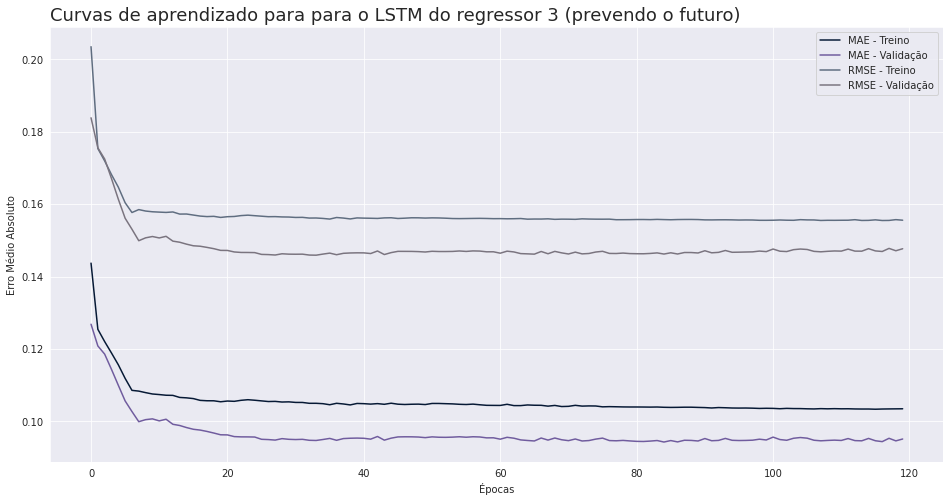

In [ ]:
# Plot do aprendizado

fig, ax = plt.subplots(figsize=(16,8))

ax.plot(train_loss3, label='MAE - Treino', color='#061935')
ax.plot(valid_loss3, label='MAE - Validação', color='#705c9e')

ax.plot(rmse_train_loss3, label='RMSE - Treino', color='#5f6d80')
ax.plot(rmse_valid_loss3, label='RMSE - Validação', color='#7a747f')

ax.set_title('Curvas de aprendizado para para o LSTM do regressor 3 (prevendo o futuro)', loc='left', size=18)
ax.set_xlabel('Épocas')
ax.set_ylabel('Erro Médio Absoluto')

ax.legend(loc='best')

plt.show()

Predições

In [ ]:
y_test_original3 = y3[(n_train+n_valid):, :]
y_test_original3

array([[1.49, 1.35],
       [1.35, 1.16],
       [1.16, 1.24],
       ...,
       [1.71, 1.8 ],
       [1.8 , 1.96],
       [1.96, 1.71]])

In [ ]:
# Realizando as predições e transformando o resultado para a escala original
y_pred_scaled3 = regressor3.predict(X_test3)
y_pred3 = scaler_y3.inverse_transform(y_pred_scaled3)

In [ ]:
# Calculando os erros da predição
mae3 = mean_absolute_error(y_test_original3, y_pred3)
rmse3 = np.sqrt(mean_squared_error(y_test_original3, y_pred3))

In [ ]:
print(f'Avaliação das predições:')
print(f'MAE : {mae3:.4f}')
print(f'RMSE: {rmse3:.4f}')

Avaliação das predições:
MAE : 0.5308
RMSE: 0.8156


In [ ]:
# Dados de teste apenas para comparação com gráfico
df3.iloc[(n_train+n_valid):, :]

t-2   t-1    t0   t+1   t+2
date_hour                                        
2017-08-16 07:00:00  3.37  1.55  1.57  1.49  1.35
2017-08-16 08:00:00  1.55  1.57  1.49  1.35  1.16
2017-08-16 09:00:00  1.57  1.49  1.35  1.16  1.24
2017-08-16 10:00:00  1.49  1.35  1.16  1.24  1.17
2017-08-16 11:00:00  1.35  1.16  1.24  1.17  1.49
...                   ...   ...   ...   ...   ...
2017-09-09 17:00:00  2.46  2.36  2.74  1.83  1.65
2017-09-09 18:00:00  2.36  2.74  1.83  1.65  1.71
2017-09-09 19:00:00  2.74  1.83  1.65  1.71  1.80
2017-09-09 20:00:00  1.83  1.65  1.71  1.80  1.96
2017-09-09 21:00:00  1.65  1.71  1.80  1.96  1.71

[591 rows x 5 columns]

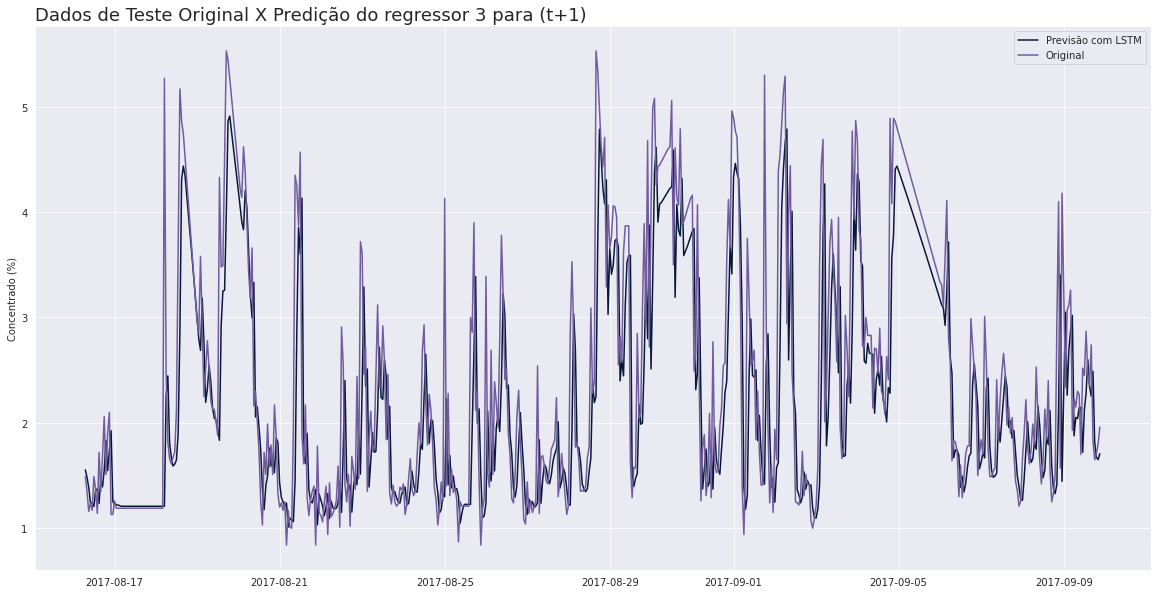

In [ ]:
plt.figure(figsize=(20,10)) 

plt.plot(df3.index[-n_test+1:], y_pred3[:, 0], color = '#061935', label='Previsão com LSTM')
plt.plot(df3.index[-n_test+1:], y_test_original3[:, 0], color = '#705c9e', label='Original')
plt.title('Dados de Teste Original X Predição do regressor 3 para (t+1)', loc='left', size=18)
plt.ylabel('Concentrado (%)')
plt.legend()
plt.show()

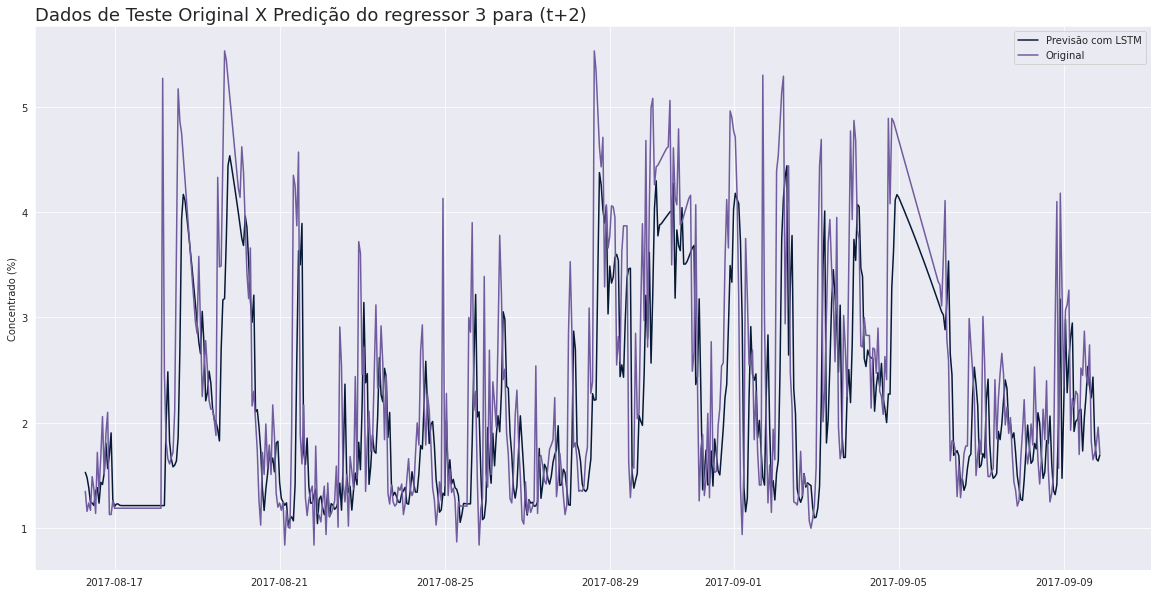

In [ ]:
plt.figure(figsize=(20,10)) 

plt.plot(df3.index[-n_test+1:], y_pred3[:, 1], color = '#061935', label='Previsão com LSTM')
plt.plot(df3.index[-n_test+1:], y_test_original3[:, 1], color = '#705c9e', label='Original')
plt.title('Dados de Teste Original X Predição do regressor 3 para (t+2)', loc='left', size=18)
plt.ylabel('Concentrado (%)')
plt.legend()
plt.show()

In [ ]:
resultados3 = pd.DataFrame()

resultados3['t+1 original'] = y_test_original3[:,0]
resultados3['t+2 original'] = y_test_original3[:,1]
resultados3['t+1 predito'] = y_pred3[:,0]
resultados3['t+2 predito'] = y_pred3[:,1]

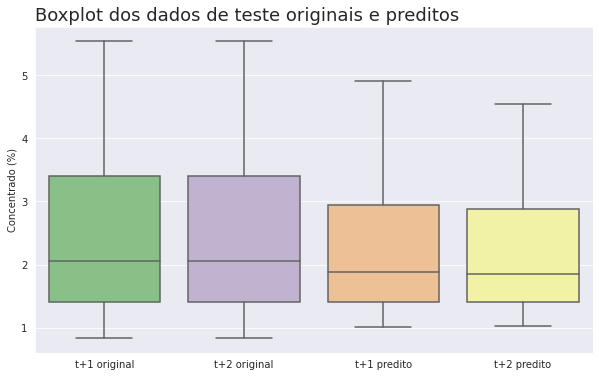

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=resultados3)
plt.title('Boxplot dos dados de teste originais e preditos', loc='left', size=18)
plt.ylabel('Concentrado (%)')
plt.show()

**Análises do resultado do modelo de LSTM e considerações para novos testes**:

- Os erros do modelo 3 estão bem próximos dos erros do modelo 2, considerando o mesmo conjunto de teste, praticamente. Tendo a confiar no resultado do modelo.

- No entanto, com a observação dos gráficos, veririca-se que a precisão maior é da previsão da primeira hora futura (t+1).

- Com o boxplot pode ser verificado que o modelo capta melhor a variação da predição de t+1.

